#  spectra for AuxTel and Equivalent width with Specutils For Ronchi

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : April 21th  2021
- update : April 22th  2021
- version v1.0

# Imports

In [90]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [91]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [92]:
from datetime import datetime,date

In [93]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [94]:
string_date

'2021-04-22'

In [95]:
from iminuit import Minuit
import iminuit

In [96]:
iminuit.__version__

'2.2.0'

In [97]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.spectrum import Spectrum, detect_lines
from spectractor.extractor.spectrum import *
from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1,H2O_2
from spectractor.config import load_config
from spectractor import parameters
from spectractor.extractor.images import *
from scipy import ndimage, misc
from scipy.interpolate import interp1d

In [98]:
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

In [99]:
from time import sleep

In [100]:
from astropy.time import Time
import astropy.units as u

# Function

In [101]:
def file_target(filename):
    m=re.findall('^Cor_ronchi170lpmm_.*_(.*)_[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*[.]fits$',filename)
    if len(m)>0:
        return m
    elif re.search('NGC4755',filename):
        return ['NGC4755']
    else:
        return []

# Logbook for file selection

In [102]:
filename_logbook='logbooks/auxtellogbook_2021_ronchi_v1.1.csv'

In [103]:
df=pd.read_csv(filename_logbook,index_col=None)

In [104]:
pd.set_option('display.max_rows', None)

In [105]:
df

Unnamed: 0  index                     date  \
0            0      0  2021-03-12T01:19:36.315   
1            1      1  2021-03-12T01:20:18.220   
2            2      2  2021-03-12T01:20:33.072   
3            3      3  2021-03-12T01:52:19.566   
4            4      4  2021-03-12T01:52:28.549   
5            5      5  2021-03-12T01:52:38.095   
6            6      6  2021-03-12T01:52:47.124   
7            7      7  2021-03-12T02:00:08.356   
8            8      8  2021-03-12T02:01:03.092   
9            9      9  2021-03-12T02:01:12.571   
10          10     10  2021-03-12T02:01:25.066   
11          11     11  2021-03-12T02:01:34.539   
12          12     12  2021-03-12T02:01:43.667   
13          13     13  2021-03-12T02:01:53.077   
14          14     14  2021-03-12T02:02:02.543   
15          15     15  2021-03-12T02:02:11.707   
16          16     16  2021-03-12T02:02:20.726   
17          17     17  2021-03-12T02:02:30.345   
18          18     18  2021-03-12T02:02:39.259   
19          19     19  2021-03-12T02:07:37.537   
20          20     20  2021-03-12T02:07:46.520   
21          21     21  2021-03-12T02:07:56.080   
22          22     22  2021-03-12T02:08:05.549   
23          23     23  2021-03-12T02:08:14.673   
24          24     24  2021-03-12T02:08:24.308   
25          25     25  2021-03-12T02:08:33.212   
26          26     26  2021-03-12T02:08:42.267   
27          27     27  2021-03-12T02:08:51.794   
28          28     28  2021-03-12T02:09:00.972   
29          29     29  2021-03-12T02:09:09.968   
30          30     30  2021-03-12T02:09:19.024   
31          31     31  2021-03-12T02:09:28.107   
32          32     32  2021-03-12T02:09:37.123   
33          33     33  2021-03-12T02:09:46.801   
34          34     34  2021-03-12T02:09:55.707   
35          35     35  2021-03-12T02:10:05.242   
36          36     36  2021-03-12T02:10:14.155   
37          37     37  2021-03-12T02:10:23.897   
38          38     38  2021-03-12T02:10:32.835   
39          39     39  2021-03-12T02:10:41.829   
40          40     40  2021-03-12T02:12:55.272   
41          41     41  2021-03-12T02:13:24.878   
42          42     42  2021-03-12T02:13:54.363   
43          43     43  2021-03-12T02:14:23.894   
44          44     44  2021-03-12T02:14:52.838   
45          45     45  2021-03-12T02:15:22.506   
46          46     46  2021-03-12T02:15:51.673   
47          47     47  2021-03-12T02:16:20.767   
48          48     48  2021-03-12T02:16:50.340   
49          49     49  2021-03-12T02:17:20.093   
50          50     50  2021-03-12T02:17:50.002   
51          51     51  2021-03-12T02:18:18.901   
52          52     52  2021-03-12T02:18:48.651   
53          53     53  2021-03-12T02:19:17.846   
54          54     54  2021-03-12T02:19:46.942   
55          55     55  2021-03-12T02:20:16.111   
56          56     56  2021-03-12T02:20:45.228   
57          57     57  2021-03-12T02:21:14.248   
58          58     58  2021-03-12T02:21:43.355   
59          59     59  2021-03-12T02:22:13.199   
60          60     60  2021-03-12T02:22:42.038   
61          61     61  2021-03-12T02:25:01.311   
62          62     62  2021-03-12T02:26:52.471   
63          63     63  2021-03-12T02:28:09.532   
64          64     64  2021-03-12T02:28:48.618   
65          65     65  2021-03-12T02:31:45.865   
66          66     66  2021-03-12T02:32:14.768   
67          67     67  2021-03-12T02:32:44.376   
68          68     68  2021-03-12T02:33:13.844   
69          69     69  2021-03-12T02:33:43.257   
70          70     70  2021-03-12T02:34:12.421   
71          71     71  2021-03-12T02:34:41.512   
72          72     72  2021-03-12T02:35:10.639   
73          73     73  2021-03-12T02:35:39.746   
74          74     74  2021-03-12T02:36:08.899   
75          75     75  2021-03-12T02:36:38.134   
76          76     76  2021-03-12T02:37:07.225   
77          77     77  2021-03-12T02:37:36.328   
78          78     78  2021-03-12T02:38:05.425   
79  

# Selection of input file

In [106]:
df_good=df[df["quality"]==1]

In [107]:
for spectra_file in df_good["file"]:
    print(spectra_file)

Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_204.fits
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_205.fits
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_206.fits
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_207.fits
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_208.fits
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_209.fits
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_210.fits
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_211.fits
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_212.fits
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_213.fits
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_214.fits
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_215.fits
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_260.fits
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_261.fits
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_267.fits
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_268.fits
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_269.fits
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_270.fits
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_271.fits
Cor_ronchi17

In [108]:
dir_spectra="outputs_ronchi170lpmm"

In [109]:
!ls outputs

Cor_holo4_003_NGC4755_2021-02-17_350_lines.csv
Cor_holo4_003_NGC4755_2021-02-17_350_spectrogram.fits
Cor_holo4_003_NGC4755_2021-02-17_350_spectrum.fits
Cor_holo4_003_NGC4755_2021-02-17_350_table.csv
Cor_holo4_003_NGC4755_2021-02-17_352_lines.csv
Cor_holo4_003_NGC4755_2021-02-17_352_spectrogram.fits
Cor_holo4_003_NGC4755_2021-02-17_352_spectrum.fits
Cor_holo4_003_NGC4755_2021-02-17_352_table.csv
Cor_holo4_003_NGC4755_2021-02-17_353_lines.csv
Cor_holo4_003_NGC4755_2021-02-17_353_spectrogram.fits
Cor_holo4_003_NGC4755_2021-02-17_353_spectrum.fits
Cor_holo4_003_NGC4755_2021-02-17_353_table.csv
Cor_holo4_003_NGC4755_2021-02-17_354_lines.csv
Cor_holo4_003_NGC4755_2021-02-17_354_spectrogram.fits
Cor_holo4_003_NGC4755_2021-02-17_354_spectrum.fits
Cor_holo4_003_NGC4755_2021-02-17_354_table.csv
Cor_holo4_003_NGC4755_2021-02-17_355_lines.csv
Cor_holo4_003_NGC4755_2021-02-17_355_spectrogram.fits
Cor_holo4_003_NGC4755_2021-02-17_355_spectrum.fits
Cor_holo4_003_NGC4755_2021-02-17_355_table.csv
Cor_h

In [110]:
all_files=os.listdir(dir_spectra)

In [111]:
all_spectra_files = []
for filename in all_files:
    if re.search("_spectrum.fits$",filename):
        all_spectra_files.append(filename)
N=len(all_spectra_files)

In [112]:
all_good_spectra_spectrum_files=[]

idx=0
for good_spectra_file in df_good["file"]:
    good_spectra_spectrum_file = good_spectra_file.split(".")[0]+"_spectrum.fits"
    if good_spectra_spectrum_file in all_spectra_files:
        print(idx,") : found {}".format(good_spectra_spectrum_file))
        all_good_spectra_spectrum_files.append(good_spectra_spectrum_file)
        idx+=1
    

0 ) : found Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_204_spectrum.fits
1 ) : found Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_205_spectrum.fits
2 ) : found Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_206_spectrum.fits
3 ) : found Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_207_spectrum.fits
4 ) : found Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_208_spectrum.fits
5 ) : found Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_209_spectrum.fits
6 ) : found Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_210_spectrum.fits
7 ) : found Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_211_spectrum.fits
8 ) : found Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_212_spectrum.fits
9 ) : found Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_213_spectrum.fits
10 ) : found Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_214_spectrum.fits
11 ) : found Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_215_spectrum.fits
12 ) : found Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_260_spectrum.fits
13 ) : found Cor_ronchi170lpmm_RG610_HD75519_202

0 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_204_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_204_spectrum.fits


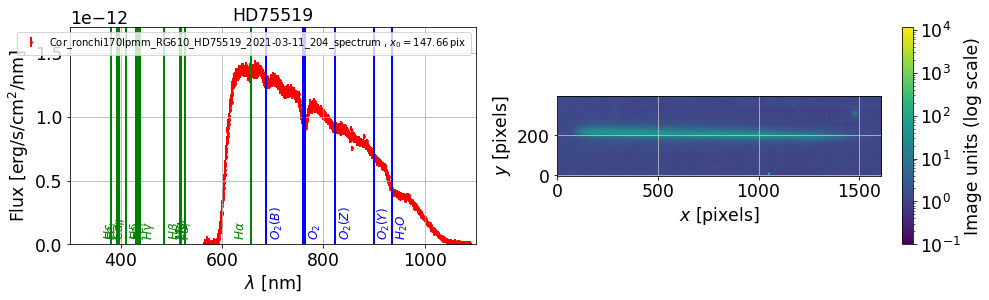

1 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_205_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_205_spectrum.fits


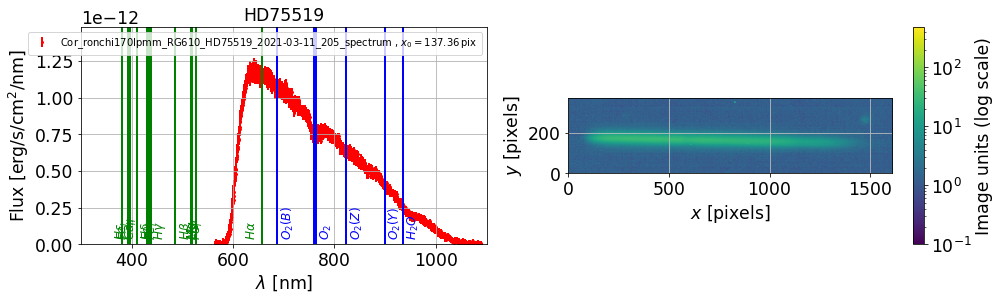

2 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_206_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_206_spectrum.fits


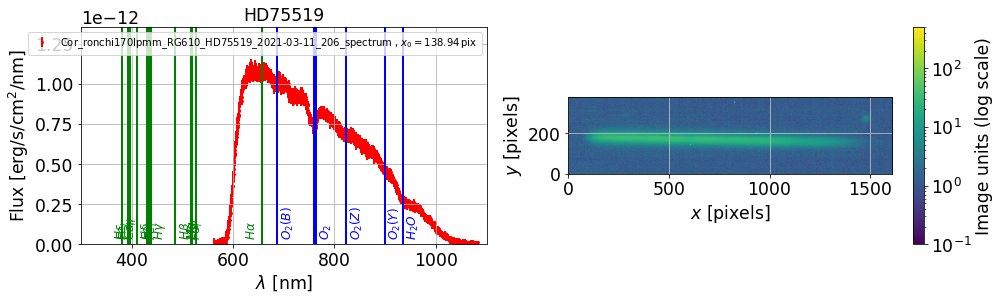

3 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_207_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_207_spectrum.fits


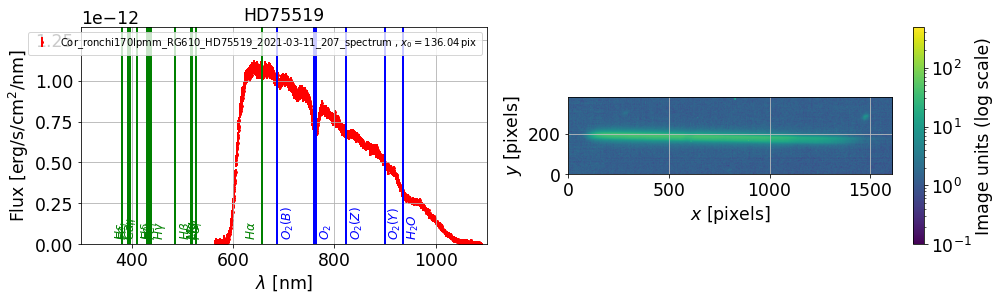

4 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_208_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_208_spectrum.fits


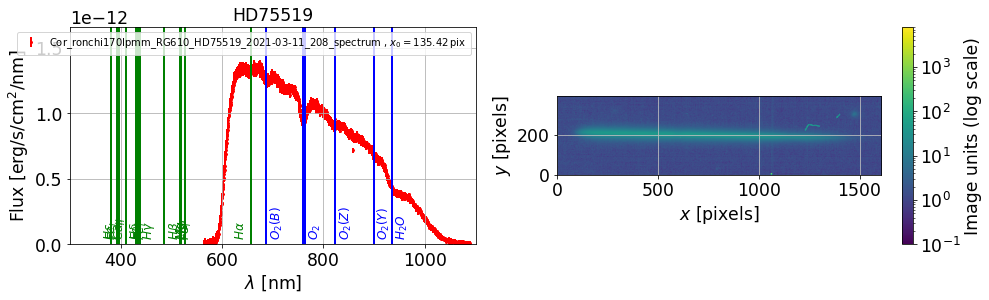

5 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_209_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_209_spectrum.fits


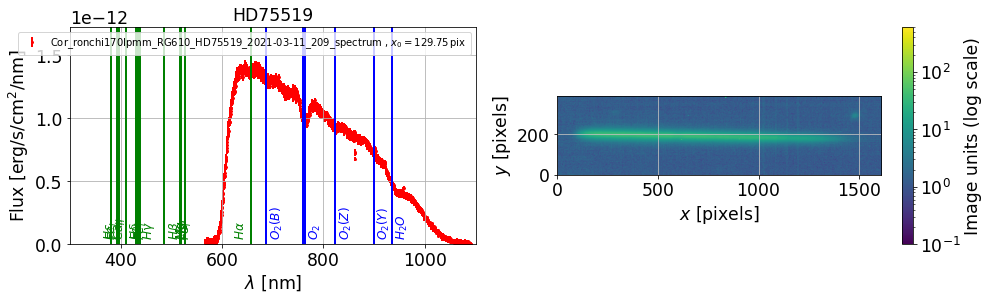

6 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_210_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_210_spectrum.fits


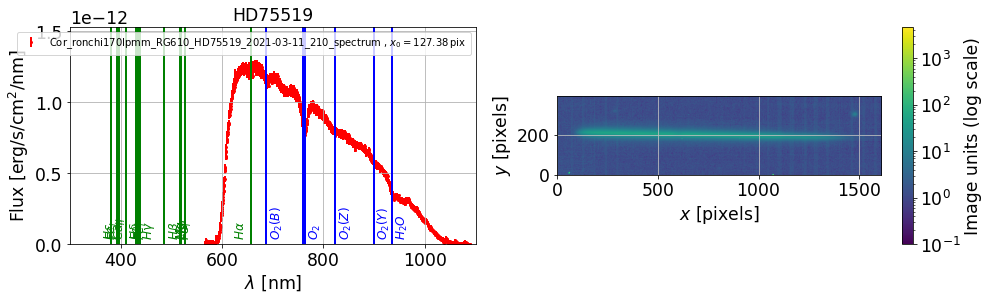

7 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_211_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_211_spectrum.fits


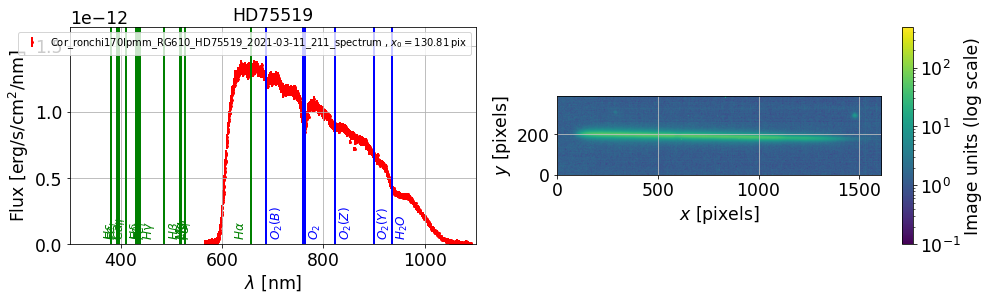

8 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_212_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_212_spectrum.fits


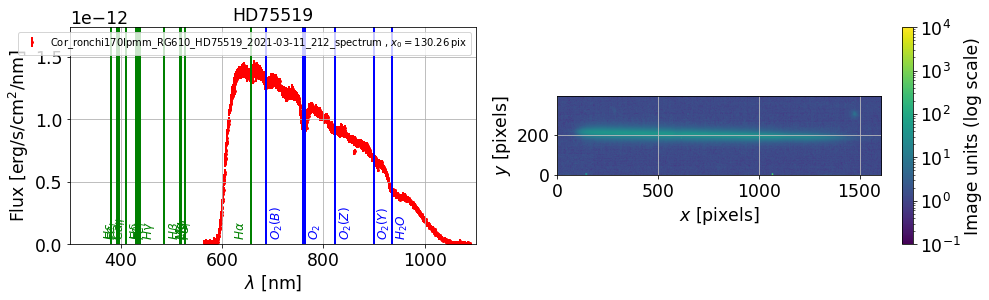

9 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_213_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_213_spectrum.fits


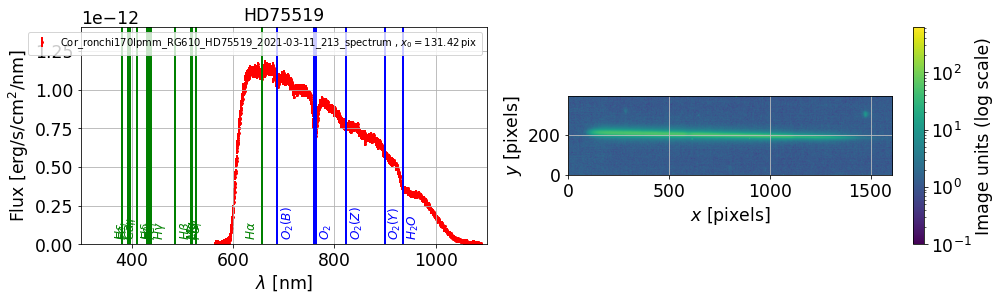

10 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_214_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_214_spectrum.fits


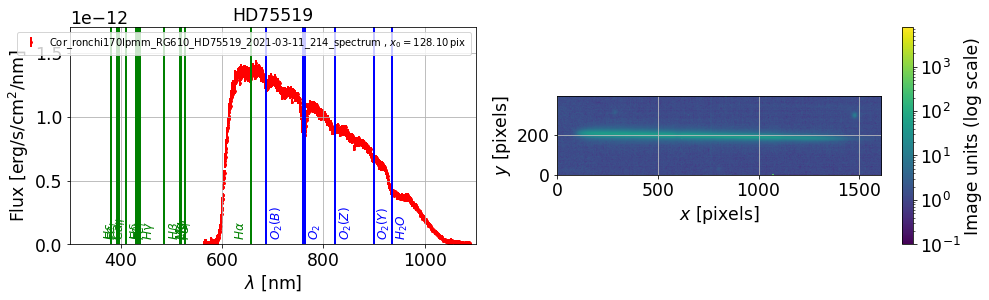

11 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_215_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_215_spectrum.fits


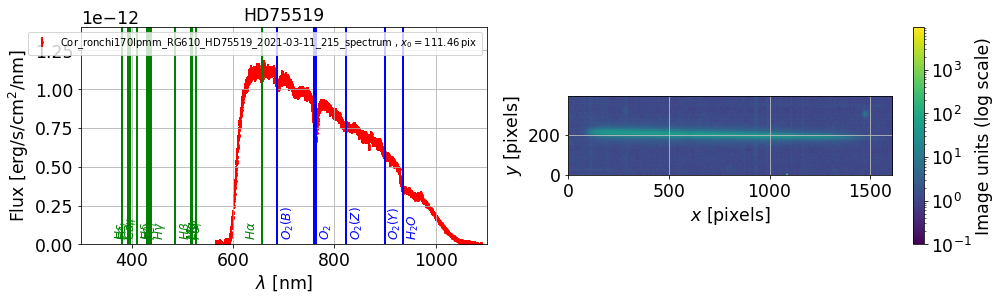

12 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_260_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_260_spectrum.fits


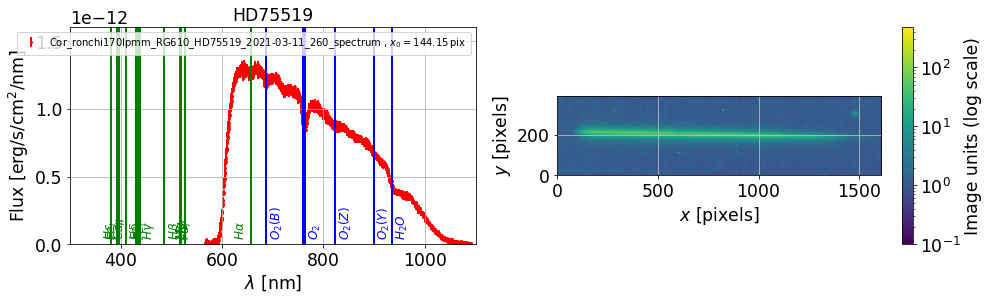

13 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_261_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_261_spectrum.fits


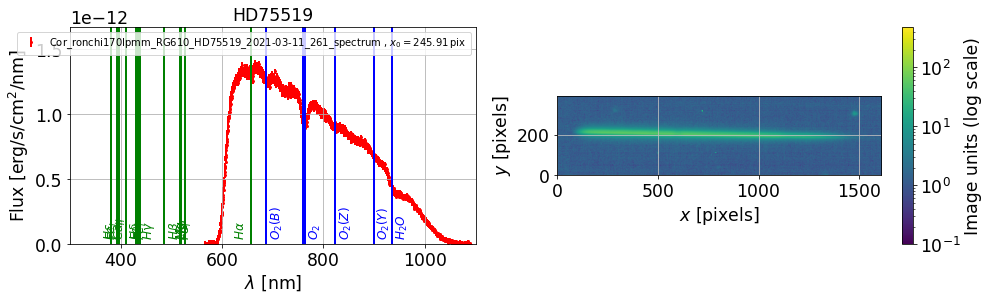

14 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_267_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_267_spectrum.fits


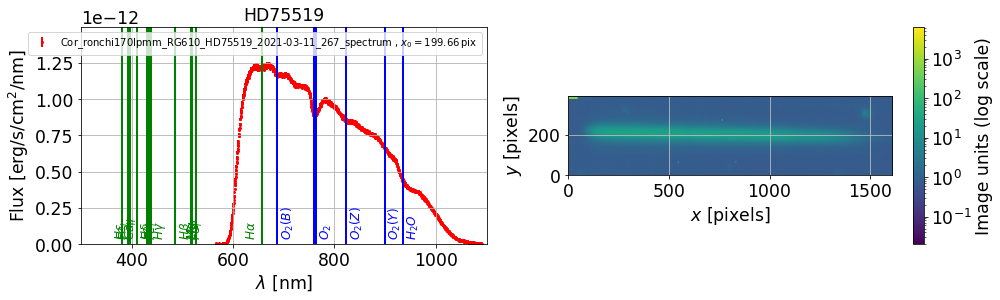

15 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_268_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_268_spectrum.fits


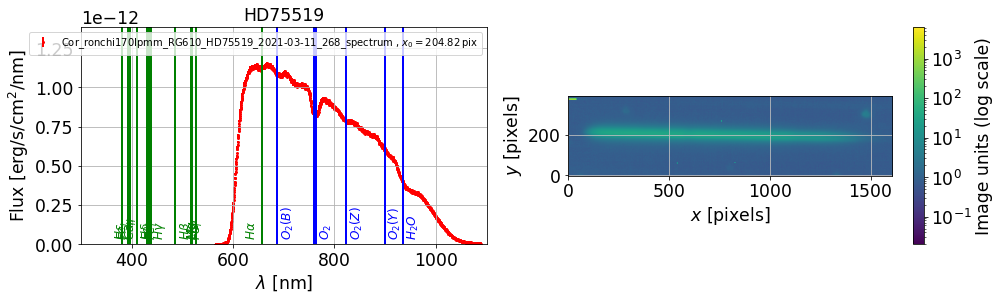

16 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_269_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_269_spectrum.fits


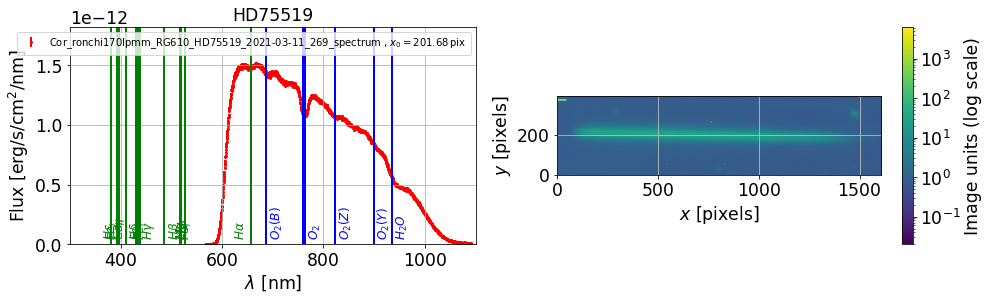

17 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_270_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_270_spectrum.fits


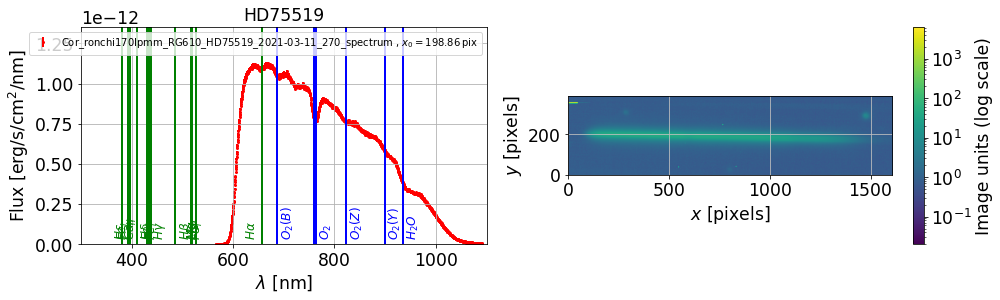

18 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_271_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_271_spectrum.fits


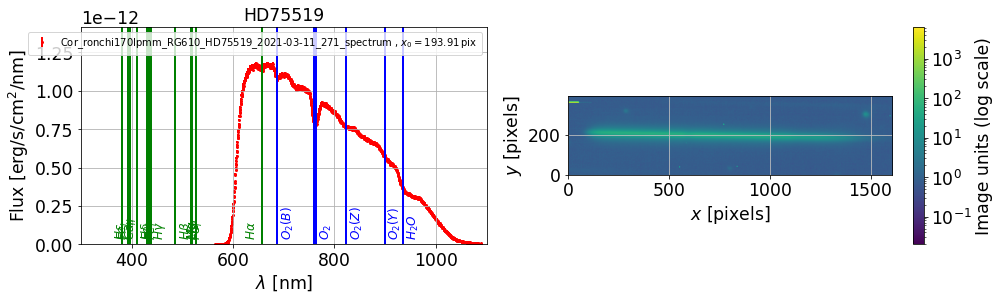

19 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_272_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_272_spectrum.fits


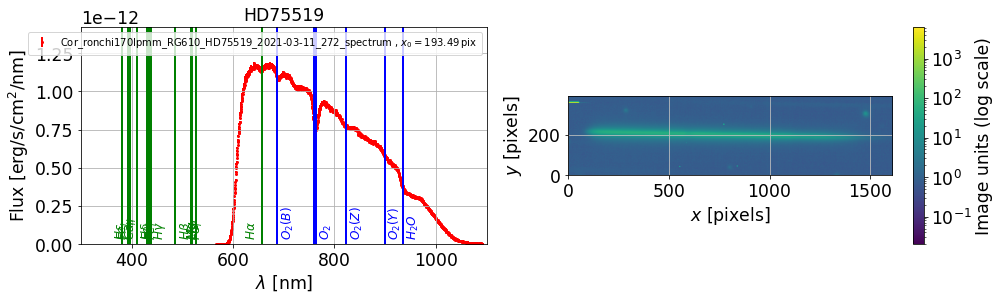

20 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_273_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_273_spectrum.fits


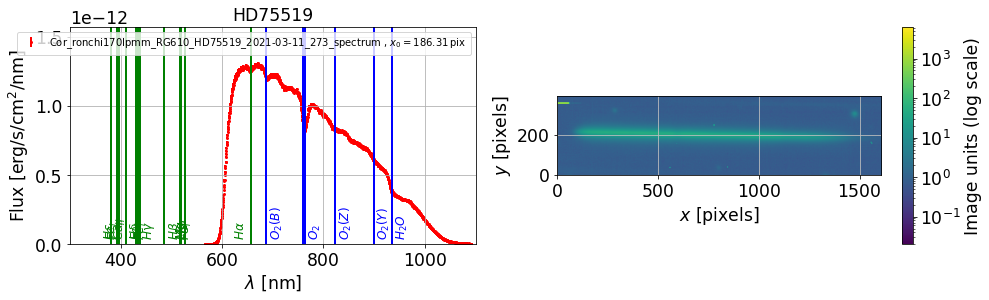

21 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_274_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_274_spectrum.fits


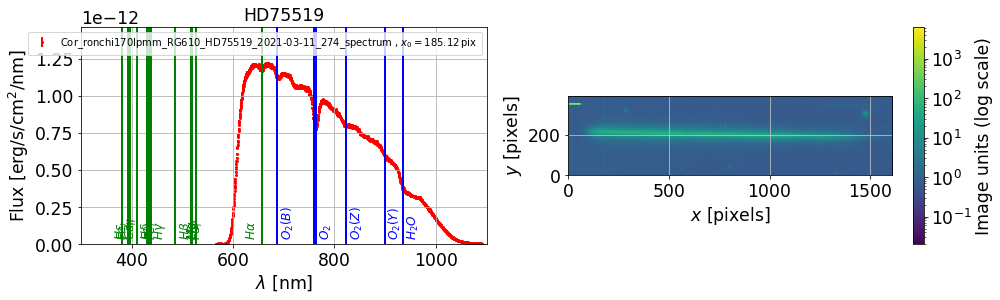

22 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_275_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_275_spectrum.fits


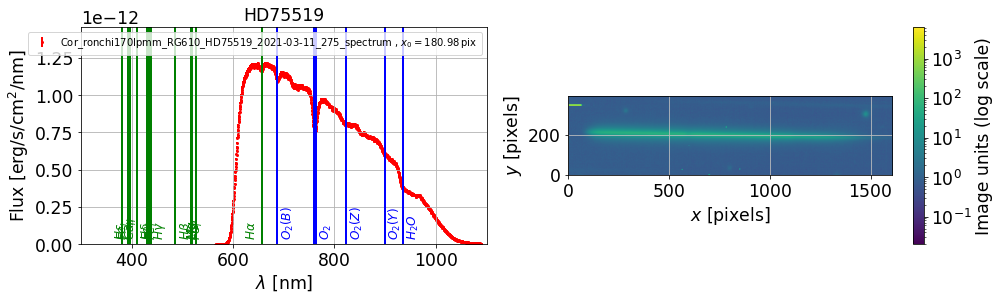

23 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_277_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_277_spectrum.fits


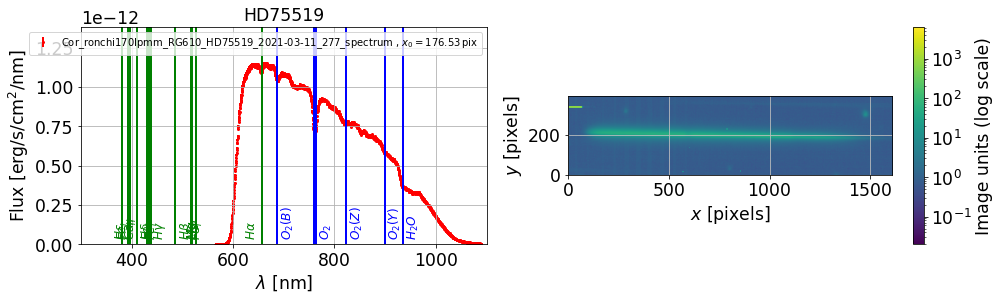

24 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_278_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_278_spectrum.fits


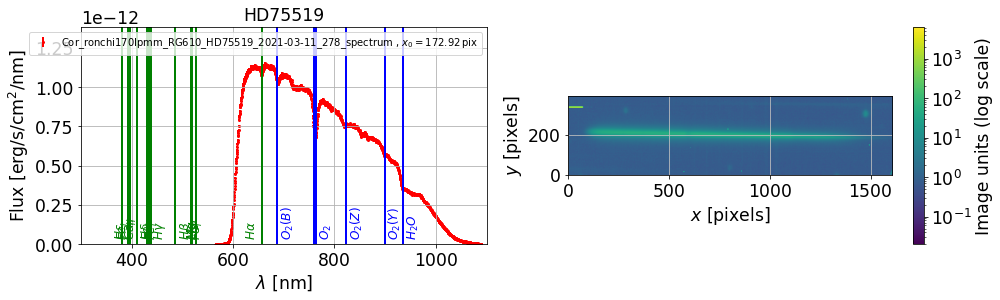

25 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_279_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_279_spectrum.fits


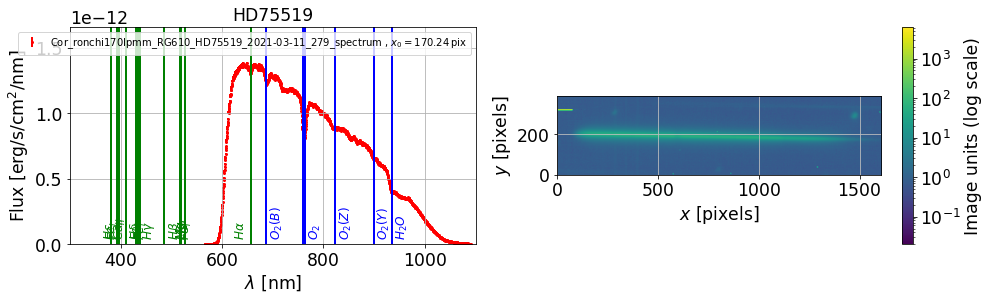

26 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_280_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_280_spectrum.fits


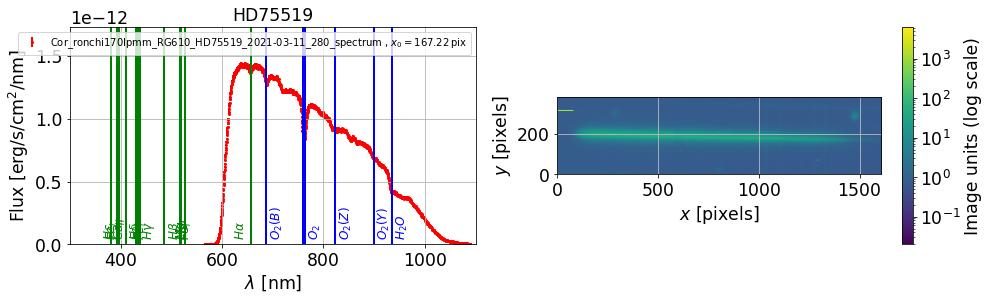

27 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_281_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_281_spectrum.fits


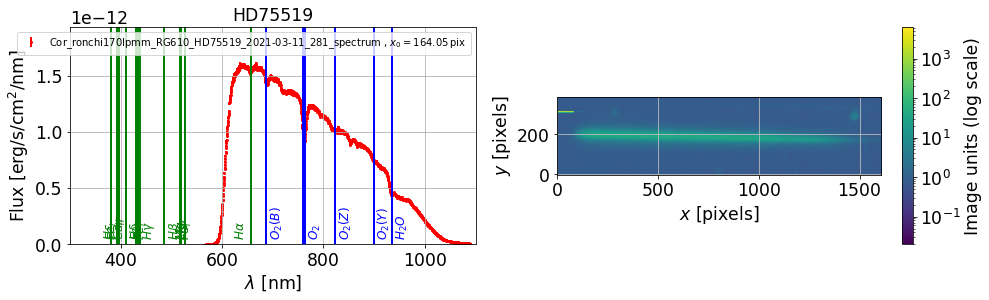

28 ) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_282_spectrum.fits   outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_282_spectrum.fits


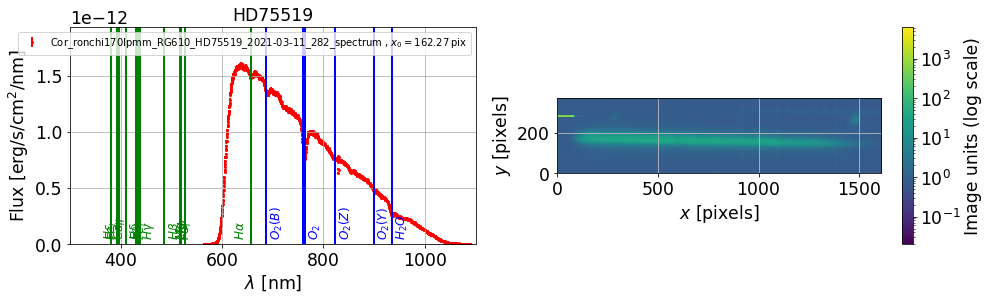

In [113]:
parameters.DISPLAY=False

infos = []

idx=0
for filename in all_good_spectra_spectrum_files:
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    
    fullfilename = os.path.join(dir_spectra,filename)
    
    print(idx,")",filename," ",fullfilename)
    
    
    #try:
    #    s=Spectrum(fullfilename, config="config/auxtel_quicklook.ini")
    #    print("Success First Connection with file "+ fullfilename)
    #    break           
    #except requests.exceptions.ConnectionError:
    #except:
    #    print("Connection refused, will retry")
    #    sleep(5)
    #    try:
    #        print("try connection again ")    
    #        s=Spectrum(fullfilename, config="config/auxtel_quicklook.ini")
    #        print("Success Second Connection ")
    #        break
        
        #except requests.exceptions.ConnectionError:
    #    except:
    #        print("Connection refused twice, give up")
    #        continue
            
    #    continue
                   
    
    s=Spectrum(fullfilename, config="config/auxtel_quicklook.ini")
    label=filename.split('.')[0]+" "
    s.plot_spectrum(ax=ax1,force_lines=True,label=label)
    
    ax2 = fig.add_subplot(1, 2, 2)
    
    fullfilename2=fullfilename.replace("_spectrum","_spectrogram")
    
    s.load_spectrogram(fullfilename2)
    s.plot_spectrogram(ax=ax2,scale="log")
    
    
    infos.append([idx,s.date_obs,s.airmass,s.temperature,s.pressure,s.humidity])
    
    
    plt.show()
    idx+=1
    

In [114]:
df_infos=pd.DataFrame(infos,columns=["idx","date_obs","airmass","temperature","pressure","humidity"])

In [115]:
df_infos.set_index('idx',inplace=True)

In [116]:
all_reftime=[ (Time(tt)-Time( df_infos["date_obs"].values[0])).to_value(u.hr) for tt in df_infos["date_obs"].values ]

In [117]:
all_reftime=np.array(all_reftime)

In [118]:
df_infos["reftime"]=all_reftime

In [119]:
df_infos["eqw_h2o"] = np.nan
df_infos["eqw_o2"] = np.nan
df_infos["eqw_o2_spec"] = np.nan

In [120]:
df_infos

date_obs   airmass  temperature  pressure  humidity  \
idx                                                                       
0    2021-03-12T01:59:39.222  1.015865         11.7    742.75      49.0   
1    2021-03-12T02:00:34.041  1.015711         11.8    742.75      50.0   
2    2021-03-12T02:00:45.847  1.015682         11.8    742.75      50.0   
3    2021-03-12T02:00:55.963  1.015652         11.8    742.75      50.0   
4    2021-03-12T02:01:05.399  1.015628         11.8    742.75      50.0   
5    2021-03-12T02:01:14.535  1.015604         11.8    742.75      50.0   
6    2021-03-12T02:01:23.959  1.015580         11.8    742.75      50.0   
7    2021-03-12T02:01:33.423  1.015556         11.8    742.75      50.0   
8    2021-03-12T02:01:42.583  1.015534         11.8    742.75      50.0   
9    2021-03-12T02:01:51.595  1.015511         11.7    742.75      49.0   
10   2021-03-12T02:02:01.208  1.015488         11.7    742.75      49.0   
11   2021-03-12T02:02:10.132  1.015467         11.7    742.75      49.0   
12   2021-03-12T02:27:40.385  1.016017         11.5    742.70      50.0   
13   2021-03-12T02:28:19.492  1.016133         11.5    742.70      48.0   
14   2021-03-12T02:34:03.294  1.017425         12.0    742.70      52.0   
15   2021-03-12T02:34:32.382  1.017556         12.0    742.70      52.0   
16   2021-03-12T02:35:01.511  1.017691         12.0    742.70      52.0   
17   2021-03-12T02:35:30.613  1.017829         12.0    742.70      51.0   
18   2021-03-12T02:35:59.774  1.017970         12.0    742.70      51.0   
19   2021-03-12T02:36:29.008  1.018115         12.0    742.70      51.0   
20   2021-03-12T02:36:58.091  1.018262         12.0    742.70      51.0   
21   2021-03-12T02:37:27.192  1.018412         11.9    742.65      51.0   
22   2021-03-12T02:37:56.292  1.018565         11.9    742.65      51.0   
23   2021-03-12T02:38:54.496  1.018881         11.9    742.70      52.0   
24   2021-03-12T02:39:23.593  1.019045         12.0    742.70      55.0   
25   2021-03-12T02:39:52.764  1.019210         12.0    742.70      55.0   
26   2021-03-12T02:40:21.908  1.019379         11.9    742.70      55.0   
27   2021-03-12T02:40:50.895  1.019551         11.9    742.70      55.0   
28   2021-03-12T02:41:20.150  1.019726         11.9    742.70      55.0   

      reftime  eqw_h2o  eqw_o2  eqw_o2_spec  
idx                                          
0    0.000000      NaN     NaN          NaN  
1    0.015228      NaN     NaN          NaN  
2    0.018507      NaN     NaN          NaN  
3    0.021317      NaN     NaN          NaN  
4    0.023938      NaN     NaN          NaN  
5    0.026476      NaN     NaN          NaN  
6    0.029094      NaN     NaN          NaN  
7    0.031722      NaN     NaN          NaN  
8    0.034267      NaN     NaN          NaN  
9    0.036770      NaN     NaN          NaN  
10   0.039441      NaN     NaN          NaN  
11   0.041919      NaN     NaN          NaN  
12   0.466990      NaN     NaN          NaN  
13   0.477853      NaN     NaN          NaN  
14   0.573353      NaN     NaN          NaN  
15   0.581433      NaN     NaN          NaN  
16   0.589525      NaN     NaN          NaN  
17   0.597609      NaN     NaN          NaN  
18   0.605709      NaN     NaN          NaN  
19   0.613829      NaN     NaN          NaN  
20   0.621908      NaN     NaN          NaN  
21   0.629992      NaN     NaN          NaN  
22   0.638075      NaN     NaN          NaN  
23   0.654243      NaN     NaN          NaN  
24   0.662325      NaN     NaN          NaN  
25   0.670428      NaN     NaN          NaN  
26   0.678524      NaN     NaN          NaN  
27   0.686576      NaN     NaN          NaN  
28   0.694702      NaN     NaN          NaN

# Selection of spectra and equivalent width calculation

In [121]:
from astropy import units as u
from astropy.visualization import quantity_support

quantity_support()  # for getting units on the axes below  

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f7f81be5b90>

In [122]:
from specutils import Spectrum1D
from specutils.fitting import fit_generic_continuum,fit_continuum
from specutils import SpectralRegion
from specutils.analysis import equivalent_width
from astropy.modeling import models
from specutils.manipulation import extract_region

In [123]:
#IDXSEL=8
IDXSEL=10
filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")

In [124]:
thetitle=str(IDXSEL)+") "+filename_SEL

In [125]:
thetitle

'10) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_214_spectrum.fits'

In [126]:
fullfilename_SEL

'outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_214_spectrum.fits'

## Load spectrum and Spectrogram

In [127]:
s=Spectrum(fullfilename_SEL, config="config/auxtel_quicklook.ini")
s.load_spectrogram(fullfilename_spectrogram_SEL) 

In [128]:
lines = Lines([O2_1,H2O_1,H2O_2],atmospheric_lines=True, redshift=0, emission_spectrum=False)

In [129]:
s.lines = lines

In [130]:
lambdas = np.arange(300,1000,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)

In [131]:
global_chisq = detect_lines(lines, s.lambdas, s.data, s.err, fwhm_func=fwhm_func)

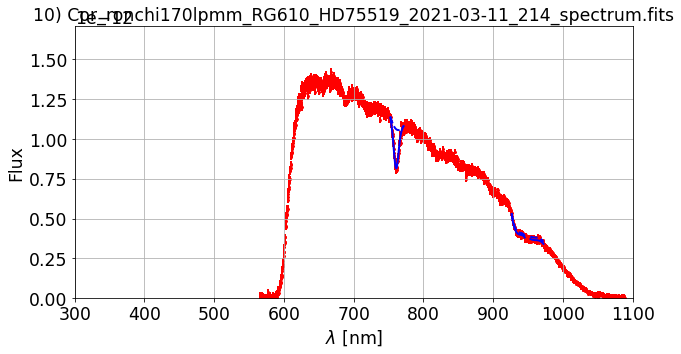

In [132]:
fig = plt.figure(figsize=(10,5))
plot_spectrum_simple(plt.gca(), s.lambdas, s.data, s.err)
lines.plot_detected_lines(plt.gca())
thetitle=str(IDXSEL)+") "+ filename_SEL
plt.title(thetitle)
plt.show()

In [133]:
lines.print_detected_lines()

<Table length=1>
  Line  Tabulated Detected   Shift   ...   Chisq    Eqwidth_mod Eqwidth_data
            nm       nm        nm    ...  reduced        nm          nm     
bytes12  float32  float32   float32  ...  float32     float32     float32   
------- --------- -------- --------- ... ---------- ----------- ------------
            760.3 760.8393 0.5393242 ... 0.85410774   1.9086682    2.5163364

## with specutils

### Convert in specutils units

In [134]:
lamb = 10*s.lambdas * u.AA 
flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10. 
fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
spec = Spectrum1D(spectral_axis=lamb, flux=flux)
specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)

## Equivalent width calculation with Automatic line plot

In [135]:
def ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=None,ax2=None):
    """
    
    ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True)
    
    - input :
    
    
    - output :
    
    """
            
    # region used to fit bacgroud        
    sub_region = SpectralRegion(wlmin , wlmax)
    # line region to remove background
    line_region = SpectralRegion(wlminline , wlmaxline)
    
    # region where one extract the spectrum
    sub_spectrum = extract_region(spec, sub_region)
    
    # initialisaition of linear model
    g_init = models.Linear1D(slope=0,intercept=1e-12)
    
    # fit on sub-spectrum
    g1_fit = fit_generic_continuum(sub_spectrum,model=g_init,exclude_regions=[line_region])
    # fit by keeping the whole spectrum , but fitting on hte relevant part of the spectrum
    g2_fit = fit_continuum(spec,model=g_init,window=sub_region,exclude_regions=[line_region])
    
    
    y_continuum_fitted1 = g1_fit(sub_spectrum.spectral_axis)
    y_continuum_fitted2 = g2_fit(spec.spectral_axis)
    
    # normalize the spectrum
    cont_norm_spec = spec/ y_continuum_fitted2 
    
    eqw1=equivalent_width(cont_norm_spec, regions=line_region) 
    eqw2=equivalent_width(cont_norm_spec, regions=sub_region)  
    
    
    if flag_plot:
        
        YMIN=spec.flux.min()
        YMAX=1.2*spec.flux.max()
        
        eqw_str1="$Eqw_1$ = {:2.2f} $\AA$ ".format(eqw1.value)
        eqw_str2="$Eqw_2$ = {:2.2f} $\AA$ ".format(eqw2.value)
    
    
        eqw_str='\n'.join((
        r'{}'.format(eqw_str1),
        r'{}'.format(eqw_str2)))
        
        if ax1==None: 
            f, ax1 = plt.subplots(figsize=(8,4))
            
        ax1.plot(spec.spectral_axis, spec.flux,'k-')  
        ax1.plot(sub_spectrum.spectral_axis, y_continuum_fitted1,'r-.',label="fit region")  
        ax1.plot(spec.spectral_axis, y_continuum_fitted2,'b:',label="extrapolated fit continuum")  
        ax1.set_title("Local continuum fitting")  
        ax1.grid(True)  
        ax1.legend()
        ax1.axvline(wlminline,color='r')
        ax1.axvline(wlmaxline,color="r")
        ax1.axvline(wlmin,color='g')
        ax1.axvline(wlmax,color="g")
        ax1.set_ylim(YMIN,YMAX)
        
        
        if ax2==None:
            f, ax2 = plt.subplots(figsize=(8,4)) 
            
            
        ax2.plot(spec.spectral_axis, cont_norm_spec.flux,'k-')  
        ax2.set_title("Equivalent width")  
        ax2.grid(True)  
        ax2.legend()
        ax2.axvline(wlminline,color='r')
        ax2.axvline(wlmaxline,color="r")
        ax2.axvline(wlmin,color='g')
        ax2.axvline(wlmax,color="g")
        ax2.set_ylim(0,2)
        ax2.text(0.05, 0.95, eqw_str, transform=ax2.transAxes, fontsize=12,verticalalignment='top', bbox=props)
        
    return eqw1.value,eqw2.value     

In [136]:
def ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=None,ax2=None):
    """
    
    ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline)
    
    - input :
    
    
    - output :
    
    """
    
    # region used to fit bacgroud        
    sub_region = SpectralRegion(wlmin , wlmax)
    # line region to remove background
    line_region = SpectralRegion(wlminline , wlmaxline)
         
    
    # region used to fit bacgroud        
    sub_region = SpectralRegion(wlmin , wlmax)
    # line region to remove background
    line_region = SpectralRegion(wlminline , wlmaxline)
    
    # region where one extract the spectrum
    sub_spectrum = extract_region(spec, sub_region)
    
    # initialisaition of linear model
    g_init = models.Linear1D(slope=0,intercept=1e-12)
    
    # fit on sub-spectrum
    g1_fit = fit_generic_continuum(sub_spectrum,model=g_init,exclude_regions=[line_region])
    # fit by keeping the whole spectrum , but fitting on hte relevant part of the spectrum
    g2_fit = fit_continuum(spec,model=g_init,window=sub_region,exclude_regions=[line_region])
    
    
    y_continuum_fitted1 = g1_fit(sub_spectrum.spectral_axis)
    y_continuum_fitted2 = g2_fit(spec.spectral_axis)
    
    # normalize the spectrum
    cont_norm_spec = spec/ y_continuum_fitted2 
       
    eqw10=equivalent_width(cont_norm_spec, regions=line_region).value 
    eqw20=equivalent_width(cont_norm_spec, regions=sub_region).value 
       
    # Bootstrap
    
    
    eqw1_set=np.zeros(NN)
    eqw2_set=np.zeros(NN)
    size=len(specerr.flux)
    
    # loop on trials 
    for idx in np.arange(NN):
        
        # random generator for errors
        s = np.random.normal(0, 1, size)
        
        # new flux
        newspec = Spectrum1D(spectral_axis=spec.spectral_axis, flux=spec.flux+specerr.flux*s)
              
    
        # region where one extract the spectrum
        sub_spectrum = extract_region(newspec, sub_region)
    
        # initialisaition of linear model
        g_init = models.Linear1D(slope=0,intercept=1e-12)
    
        # fit on sub-spectrum
        g1_fit = fit_generic_continuum(sub_spectrum,model=g_init,exclude_regions=[line_region])
        # fit by keeping the whole spectrum , but fitting on hte relevant part of the spectrum
        g2_fit = fit_continuum(newspec,model=g_init,window=sub_region,exclude_regions=[line_region])
    
    
        y_continuum_fitted1 = g1_fit(sub_spectrum.spectral_axis)
        y_continuum_fitted2 = g2_fit(newspec.spectral_axis)
    
        # normalize the spectrum
        cont_norm_spec = newspec/ y_continuum_fitted2 
    
    
        eqw1=equivalent_width(cont_norm_spec, regions=line_region) 
        eqw2=equivalent_width(cont_norm_spec, regions=sub_region) 
        
        
        eqw1_set[idx]=eqw1.value
        eqw2_set[idx]=eqw2.value
        
     
    eqw1_std=eqw1_set.std()
    eqw2_std=eqw2_set.std()
    
    
    if flag_plot:
        
        YMIN=spec.flux.min()
        YMAX=1.2*spec.flux.max()
        
        eqw_str1="$Eqw_1$ = {:2.2f} $\pm$ {:2.2f} $\AA$ ".format(eqw10,eqw1_std)
        eqw_str2="$Eqw_2$ = {:2.2f} $\pm$ {:2.2f} $\AA$ ".format(eqw20,eqw2_std)
    
    
        eqw_str='\n'.join((
        r'{}'.format(eqw_str1),
        r'{}'.format(eqw_str2)))
        
        if ax1==None: 
            f, ax1 = plt.subplots(figsize=(8,4))
            
        ax1.plot(spec.spectral_axis, spec.flux,'k-')  
        ax1.plot(sub_spectrum.spectral_axis, y_continuum_fitted1,'r-.',label="fit region")  
        ax1.plot(spec.spectral_axis, y_continuum_fitted2,'b:',label="extrapolated fit continuum")  
        ax1.set_title("Local continuum fitting")  
        ax1.grid(True)  
        ax1.legend()
        ax1.axvline(wlminline,color='r')
        ax1.axvline(wlmaxline,color="r")
        ax1.axvline(wlmin,color='g')
        ax1.axvline(wlmax,color="g")
        ax1.set_ylim(YMIN,YMAX)
        
        
        if ax2==None:
            f, ax2 = plt.subplots(figsize=(8,4)) 
            
            
        ax2.plot(spec.spectral_axis, cont_norm_spec.flux,'k-')  
        ax2.set_title("Equivalent width")  
        ax2.grid(True)  
        ax2.legend()
        ax2.axvline(wlminline,color='r')
        ax2.axvline(wlmaxline,color="r")
        ax2.axvline(wlmin,color='g')
        ax2.axvline(wlmax,color="g")
        ax2.set_ylim(0,2)
        ax2.text(0.05, 0.95, eqw_str, transform=ax2.transAxes, fontsize=12,verticalalignment='top', bbox=props)
               
        
    return eqw10,eqw20,eqw1_set,eqw2_set     

### The original spectrum

#### O2 line

In [137]:
wlmin=10*(O2_1.wavelength-30)*u.AA
wlmax=10*(O2_1.wavelength+30)*u.AA
wlminline=10*(O2_1.wavelength-10)*u.AA
wlmaxline=10*(O2_1.wavelength+10)*u.AA

2021-04-22 11:59:35  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


Text(0.5, 0.98, '10) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_214_spectrum.fits')

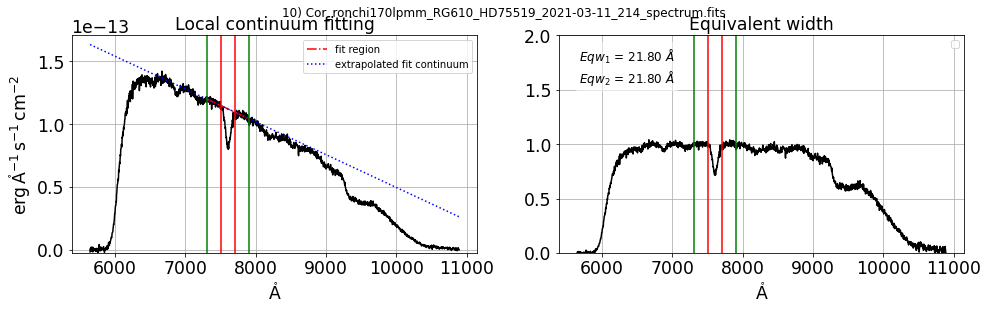

In [138]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
eq1,eq2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

2021-04-22 11:59:37  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


Text(0.5, 0.98, '10) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_214_spectrum.fits')

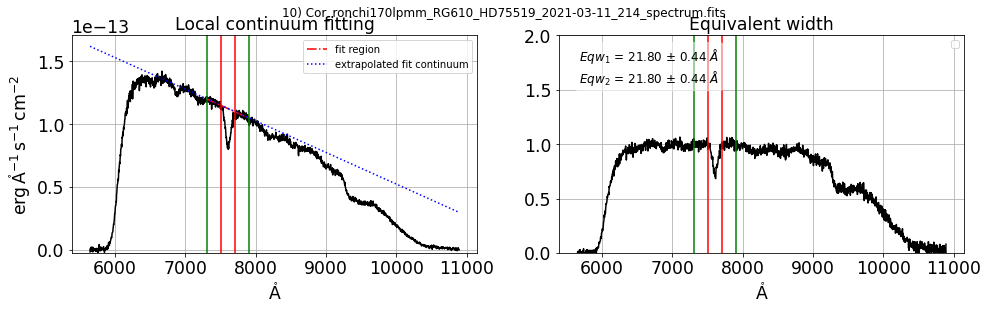

In [139]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
eqw10,eqw20,eq1_set,eq2_set=ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=30,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

Text(0.5, 0.98, '10) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_214_spectrum.fits')

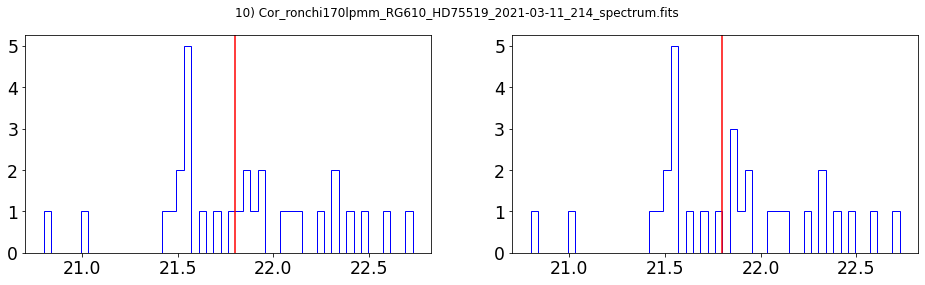

In [140]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(eq1_set,bins=50,histtype='step',color='b');
ax1.axvline(eqw10,color='r')
ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(eq2_set,bins=50,histtype='step',color="b");
ax2.axvline(eqw20,color='r')
plt.suptitle(thetitle)

### H2O line

In [141]:
wlmin=10*(H2O_1.wavelength-30)*u.AA
wlmax=10*(H2O_2.wavelength+30)*u.AA
wlminline=10*(H2O_1.wavelength-12)*u.AA
wlmaxline=10*(H2O_2.wavelength+10)*u.AA

In [142]:
lamb = 10*s.lambdas * u.AA 
flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10. 
fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
spec = Spectrum1D(spectral_axis=lamb, flux=flux)
specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)

2021-04-22 12:00:31  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


Text(0.5, 0.98, '10) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_214_spectrum.fits')

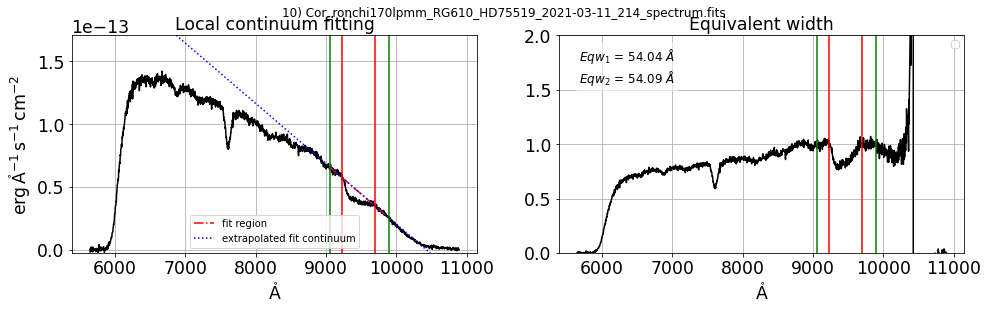

In [143]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

2021-04-22 12:00:33  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


Text(0.5, 0.98, '10) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_214_spectrum.fits')

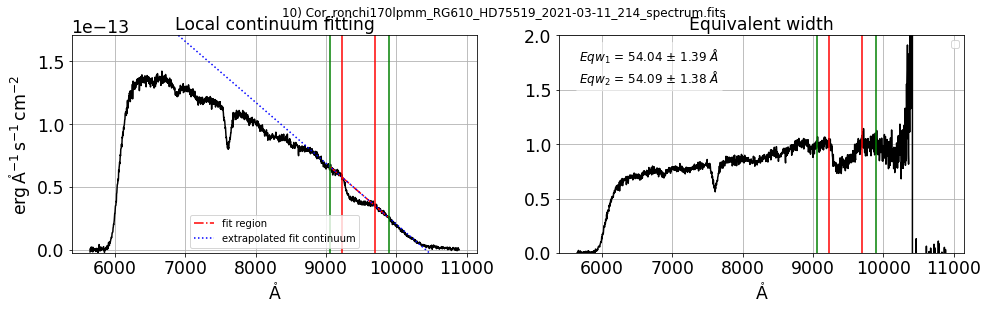

In [144]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
eqw10,eqw20,eq1_set,eq2_set=ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=30,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

Text(0.5, 0.98, '10) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_214_spectrum.fits')

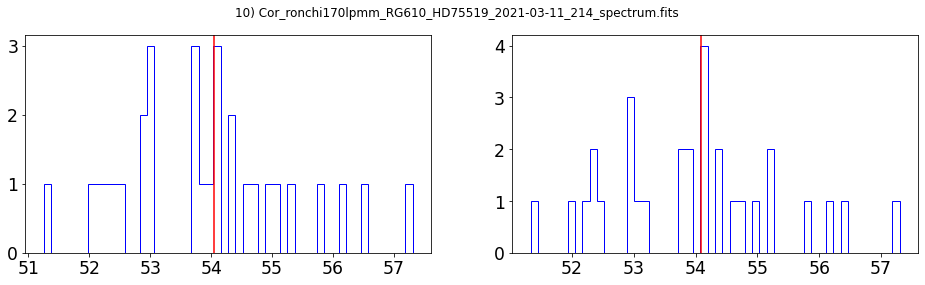

In [145]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(eq1_set,bins=50,histtype='step',color='b');
ax1.axvline(eqw10,color='r')
ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(eq2_set,bins=50,histtype='step',color='b');
ax2.axvline(eqw20,color='r')
plt.suptitle(thetitle)

# Loop on spectra with Spectractor

0 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_204_spectrum.fits


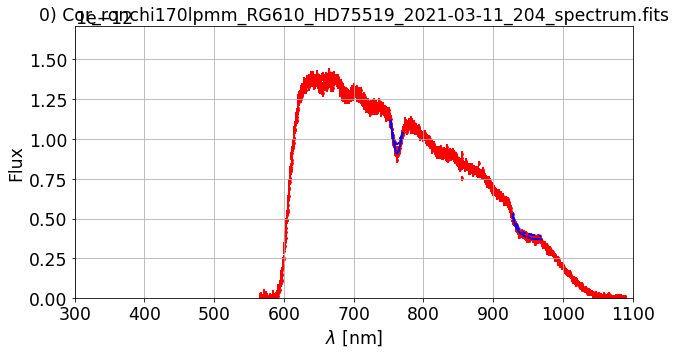

None
1 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_205_spectrum.fits


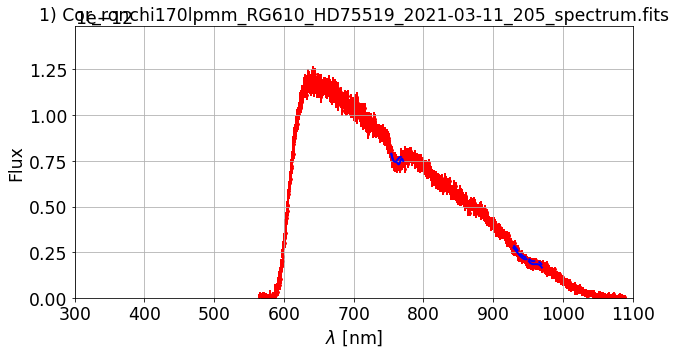

None
2 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_206_spectrum.fits


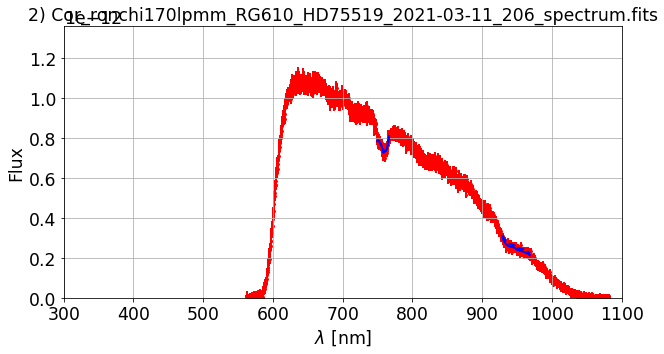

None
3 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_207_spectrum.fits


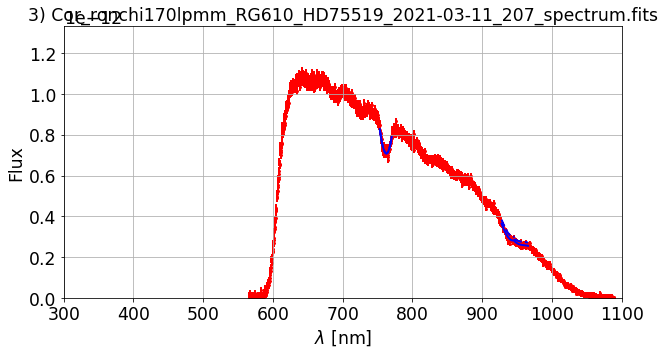

None
4 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_208_spectrum.fits


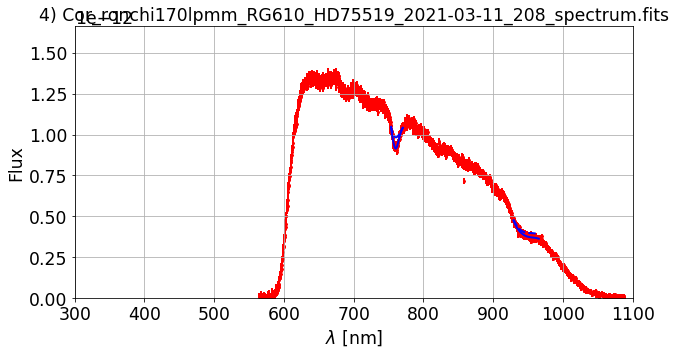

Line Tabulated Detected    Shift    ...   Chisq    Eqwidth_mod Eqwidth_data
         nm       nm         nm     ...  reduced        nm          nm     
---- --------- -------- ----------- ... ---------- ----------- ------------
         760.3 760.1489 -0.15109818 ... 0.62656873  0.60029095    1.6394367
5 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_209_spectrum.fits


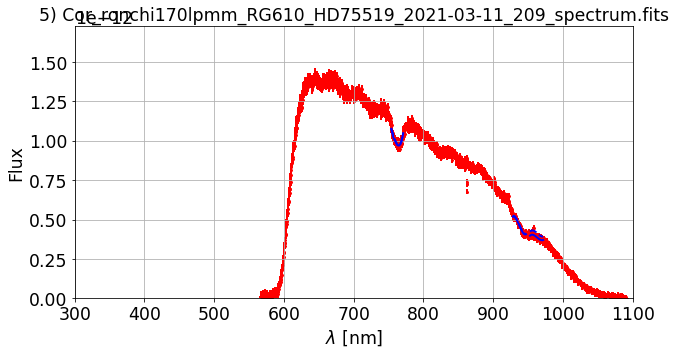

None
6 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_210_spectrum.fits


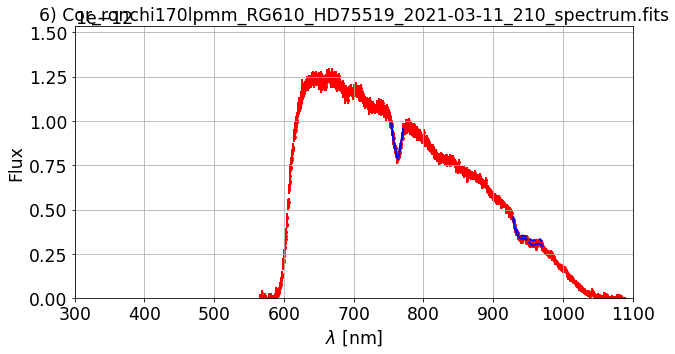

None
7 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_211_spectrum.fits


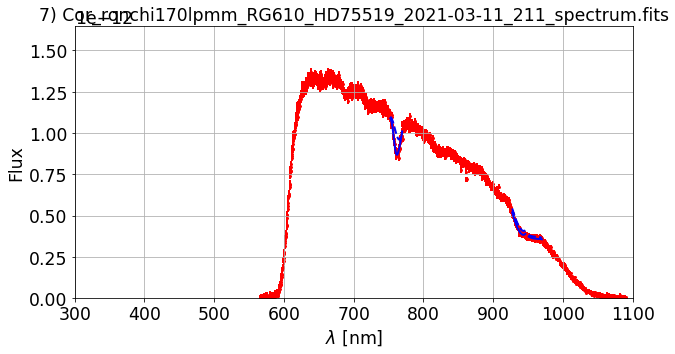

Line Tabulated Detected   Shift    ...   Chisq   Eqwidth_mod Eqwidth_data
         nm       nm        nm     ...  reduced       nm          nm     
---- --------- -------- ---------- ... --------- ----------- ------------
         760.3 760.6879 0.38795134 ... 0.8674108   1.0635866    1.0197486
8 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_212_spectrum.fits


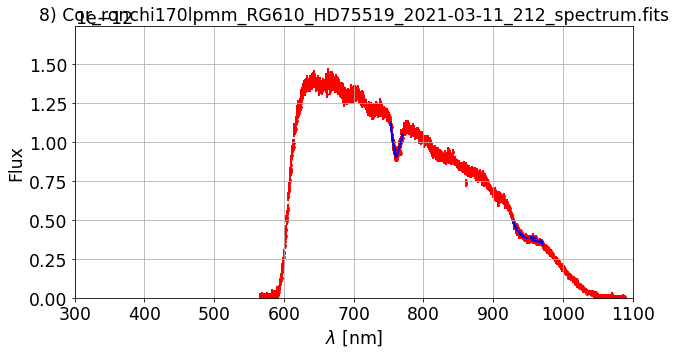

None
9 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_213_spectrum.fits


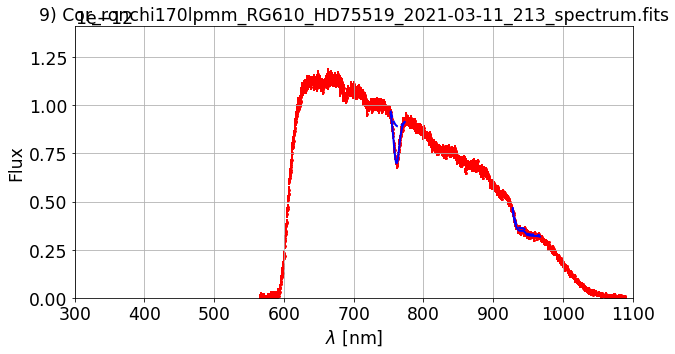

Line Tabulated Detected   Shift   ...   Chisq    Eqwidth_mod Eqwidth_data
         nm       nm        nm    ...  reduced        nm          nm     
---- --------- -------- --------- ... ---------- ----------- ------------
         760.3  761.312 1.0119869 ... 0.56700575   1.9592782     2.977794
10 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_214_spectrum.fits


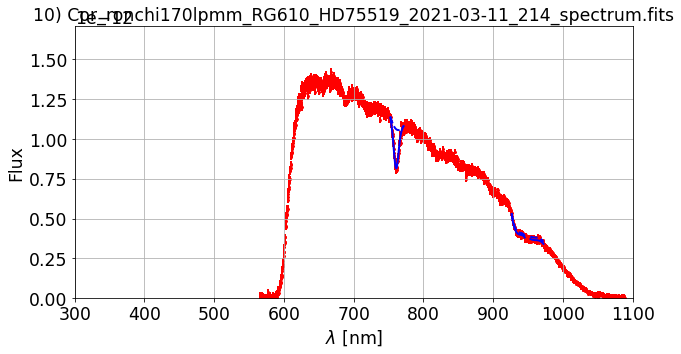

Line Tabulated Detected   Shift   ...   Chisq    Eqwidth_mod Eqwidth_data
         nm       nm        nm    ...  reduced        nm          nm     
---- --------- -------- --------- ... ---------- ----------- ------------
         760.3 760.8393 0.5393242 ... 0.85410774   1.9086682    2.5163364
11 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_215_spectrum.fits


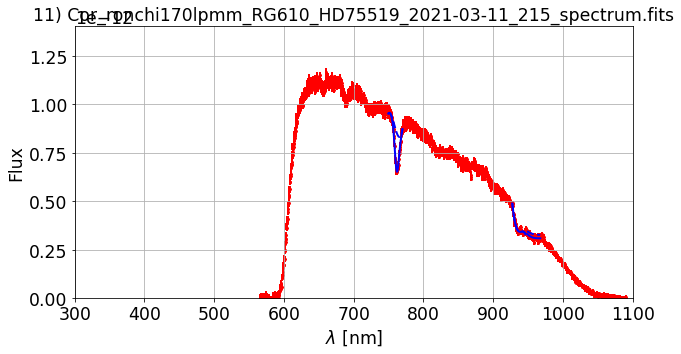

Line Tabulated  Detected   Shift   ...   Chisq    Eqwidth_mod Eqwidth_data
         nm        nm        nm    ...  reduced        nm          nm     
---- --------- --------- --------- ... ---------- ----------- ------------
         760.3 761.77594 1.4759496 ... 0.78884786   1.6261692    2.0215185
12 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_260_spectrum.fits


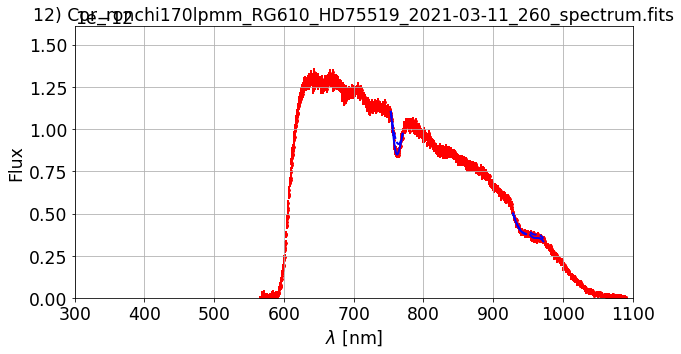

Line Tabulated Detected   Shift   ...   Chisq   Eqwidth_mod Eqwidth_data
         nm       nm        nm    ...  reduced       nm          nm     
---- --------- -------- --------- ... --------- ----------- ------------
         760.3 760.8554 0.5554076 ... 0.5465301  0.71771526    3.2076466
13 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_261_spectrum.fits


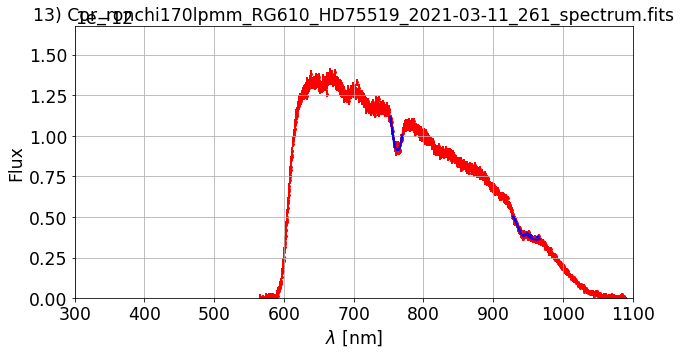

None
14 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_267_spectrum.fits


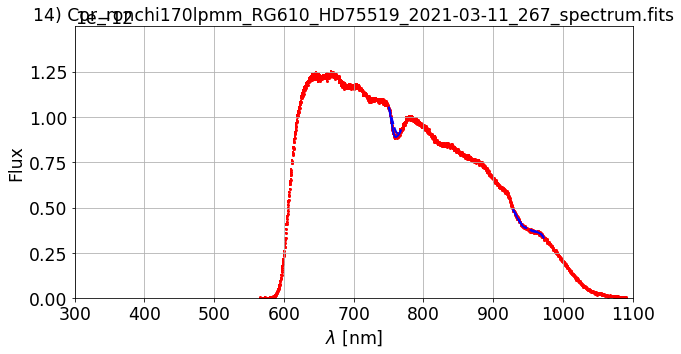

Line Tabulated Detected   Shift    ...   Chisq   Eqwidth_mod Eqwidth_data
         nm       nm        nm     ...  reduced       nm          nm     
---- --------- -------- ---------- ... --------- ----------- ------------
         760.3 757.4988 -2.8012257 ... 0.8981586  0.40544567    0.9164582
15 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_268_spectrum.fits


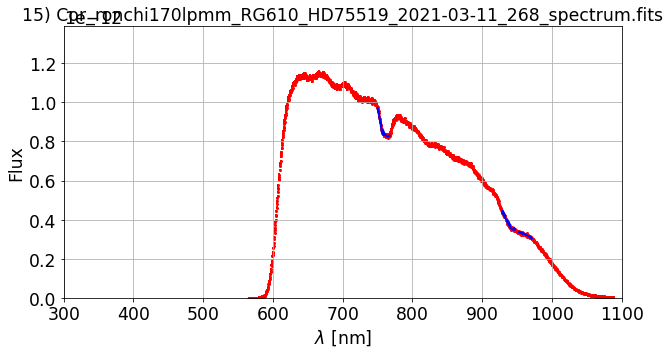

Line Tabulated Detected   Shift    ...   Chisq   Eqwidth_mod Eqwidth_data
         nm       nm        nm     ...  reduced       nm          nm     
---- --------- -------- ---------- ... --------- ----------- ------------
         760.3  756.848 -3.4519782 ... 0.6924206  0.14858016    0.2529341
16 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_269_spectrum.fits


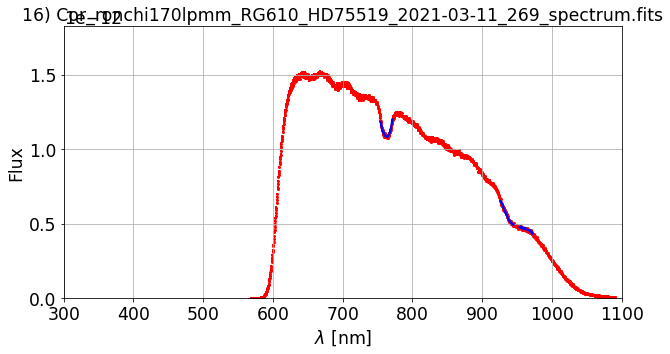

None
17 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_270_spectrum.fits


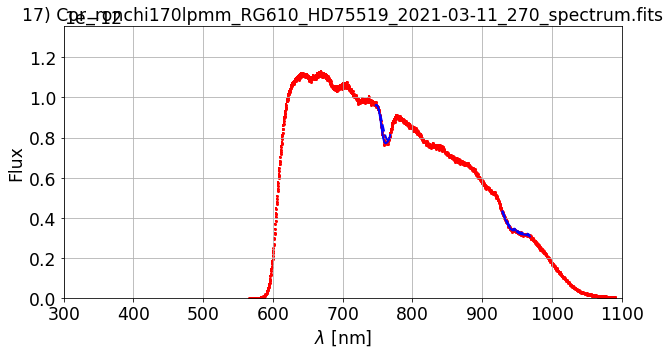

Line Tabulated Detected   Shift    ...   Chisq    Eqwidth_mod Eqwidth_data
         nm       nm        nm     ...  reduced        nm          nm     
---- --------- -------- ---------- ... ---------- ----------- ------------
         760.3  758.448 -1.8520004 ... 0.94498336   0.5032541    0.5938087
18 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_271_spectrum.fits


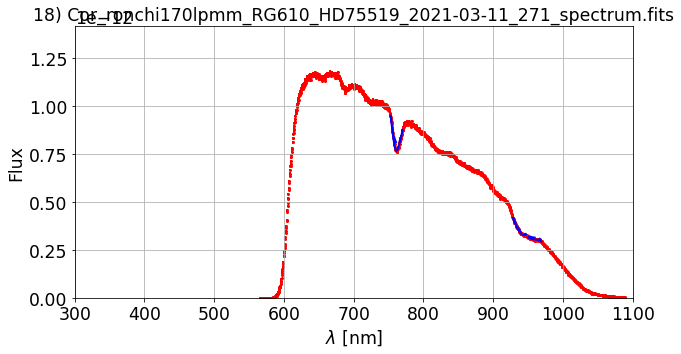

Line Tabulated  Detected    Shift    ...   Chisq   Eqwidth_mod Eqwidth_data
         nm        nm         nm     ...  reduced       nm          nm     
---- --------- --------- ----------- ... --------- ----------- ------------
         760.3 760.13605 -0.16398197 ... 0.8303077  0.42074874    1.6523305
19 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_272_spectrum.fits


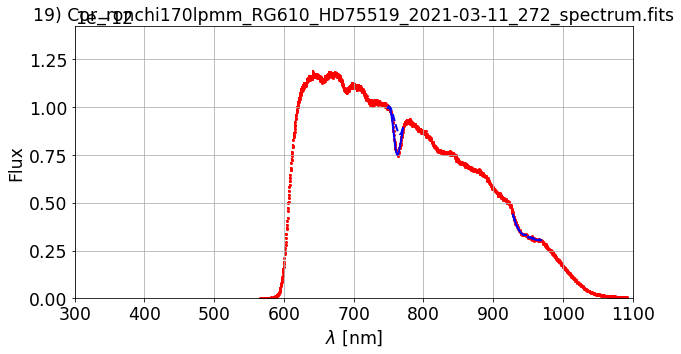

Line Tabulated Detected   Shift   ...   Chisq   Eqwidth_mod Eqwidth_data
         nm       nm        nm    ...  reduced       nm          nm     
---- --------- -------- --------- ... --------- ----------- ------------
         760.3 761.3702 1.0701492 ... 1.0420076   1.5124302    2.5943534
20 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_273_spectrum.fits


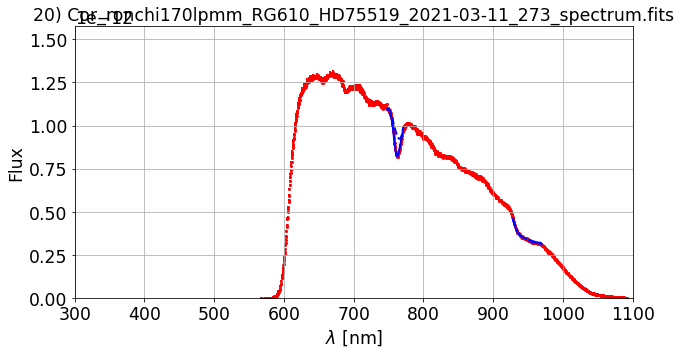

Line Tabulated Detected   Shift   ...   Chisq   Eqwidth_mod Eqwidth_data
         nm       nm        nm    ...  reduced       nm          nm     
---- --------- -------- --------- ... --------- ----------- ------------
         760.3 761.3312 1.0312066 ... 0.8939449    1.134007    1.9905006
21 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_274_spectrum.fits


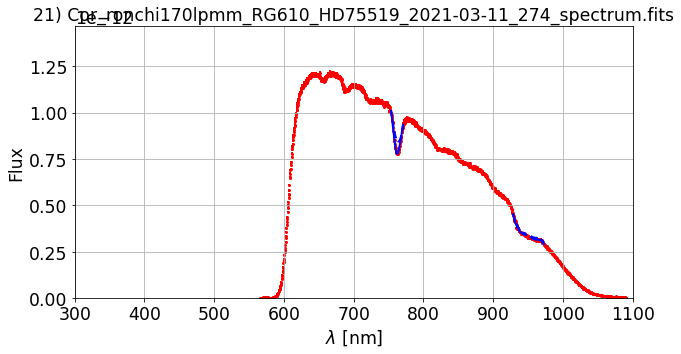

Line Tabulated  Detected   Shift   ...  Chisq   Eqwidth_mod Eqwidth_data
         nm        nm        nm    ... reduced       nm          nm     
---- --------- --------- --------- ... -------- ----------- ------------
         760.3 761.43884 1.1388321 ... 1.433872  0.67171985    2.0779245
22 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_275_spectrum.fits


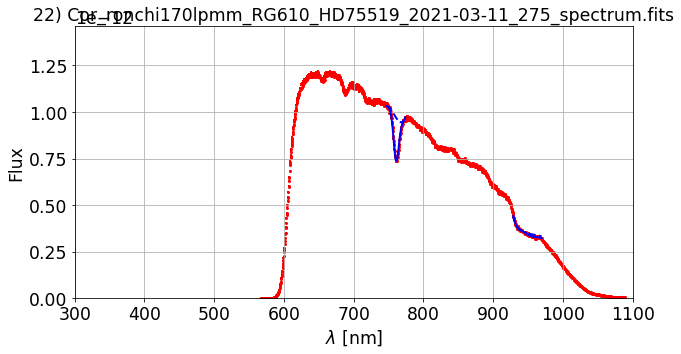

  Line  Tabulated Detected    Shift    ...   Chisq    Eqwidth_mod Eqwidth_data
            nm       nm         nm     ...  reduced        nm          nm     
------- --------- -------- ----------- ... ---------- ----------- ------------
            760.3 760.9067  0.60667413 ...  1.1158034   2.1660483    2.2802927
$H_2 O$     960.0 960.0118 0.011776422 ... 0.80045295   1.1769757    143.70207
23 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_277_spectrum.fits


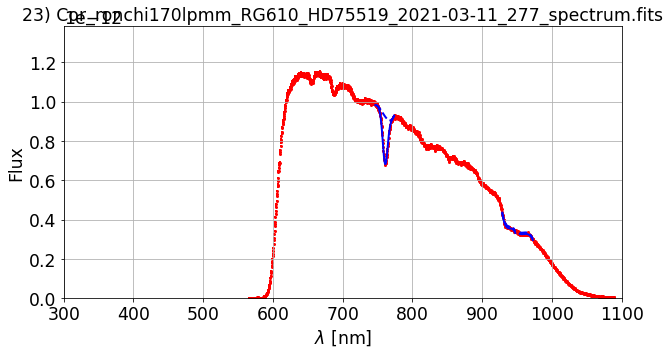

Line Tabulated Detected  Shift   ...   Chisq   Eqwidth_mod Eqwidth_data
         nm       nm       nm    ...  reduced       nm          nm     
---- --------- -------- -------- ... --------- ----------- ------------
         760.3 760.9117 0.611692 ... 1.0118972   2.2432284    2.3529687
24 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_278_spectrum.fits


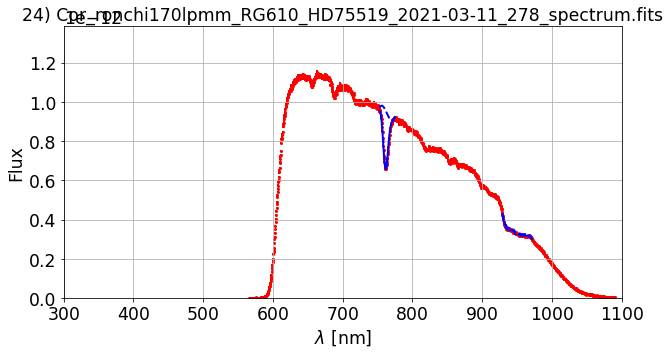

Line Tabulated Detected   Shift   ...   Chisq   Eqwidth_mod Eqwidth_data
         nm       nm        nm    ...  reduced       nm          nm     
---- --------- -------- --------- ... --------- ----------- ------------
         760.3 761.4244 1.1243495 ... 1.2776192   2.7348335    2.0046127
25 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_279_spectrum.fits


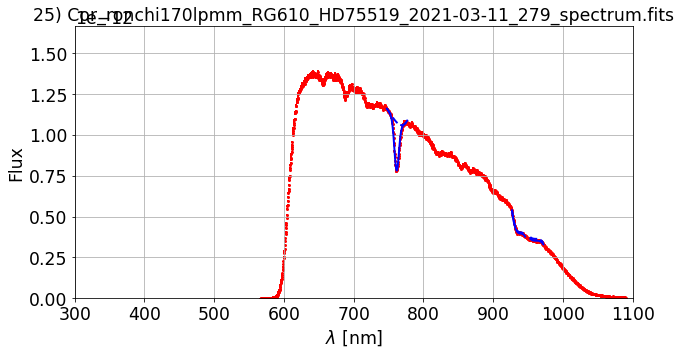

Line Tabulated Detected   Shift   ...   Chisq   Eqwidth_mod Eqwidth_data
         nm       nm        nm    ...  reduced       nm          nm     
---- --------- -------- --------- ... --------- ----------- ------------
         760.3 761.5676 1.2676276 ... 1.8443888   2.1936843    2.2091718
26 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_280_spectrum.fits


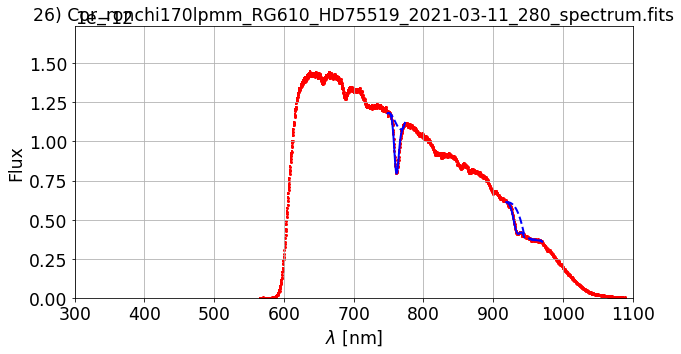

  Line  Tabulated  Detected   Shift   ...   Chisq   Eqwidth_mod Eqwidth_data
            nm        nm        nm    ...  reduced       nm          nm     
------- --------- --------- --------- ... --------- ----------- ------------
            760.3  761.3219 1.0218748 ... 1.6499901   2.1778138    2.2329268
$H_2 O$     935.0 933.92206 -1.077929 ...  1.887259   3.2671561     35.18679
27 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_281_spectrum.fits


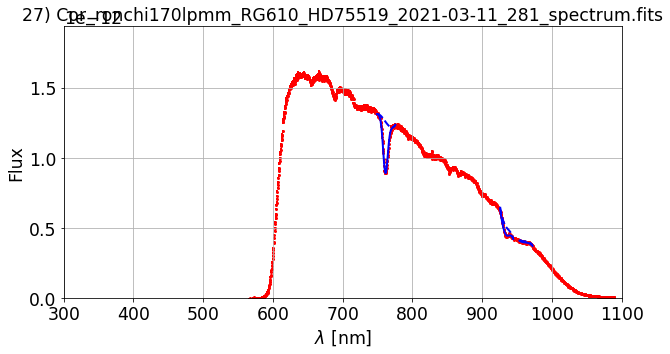

  Line  Tabulated Detected   Shift    ...   Chisq   Eqwidth_mod Eqwidth_data
            nm       nm        nm     ...  reduced       nm          nm     
------- --------- -------- ---------- ... --------- ----------- ------------
            760.3 761.2843 0.98428905 ... 1.3345602    2.403718    2.3569338
$H_2 O$     935.0 933.7244 -1.2755766 ... 2.5407507   1.3712971   -21.418816
28 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_282_spectrum.fits


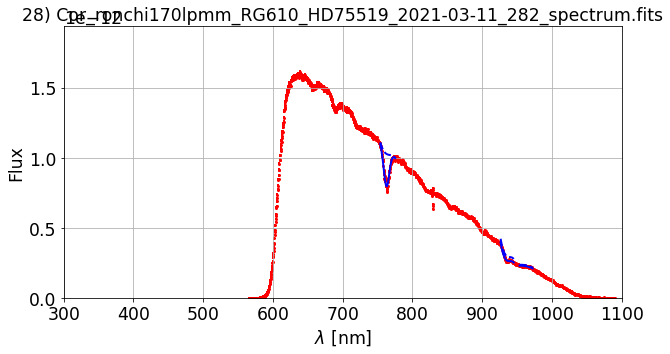

  Line  Tabulated  Detected    Shift     ...   Chisq   Eqwidth_mod Eqwidth_data
            nm        nm         nm      ...  reduced       nm          nm     
------- --------- --------- ------------ ... --------- ----------- ------------
            760.3   762.884    2.5839944 ... 3.6793065    2.085981    2.7814572
$H_2 O$     935.0 935.00104 0.0010673987 ...  2.891375   5.1073256   104.825195


In [146]:
WLMIN=300
WLMAX=1000
lambdas = np.arange(WLMIN,WLMAX,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)
parameters.DISPLAY=False


for IDXSEL in np.arange(0,29):
    filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
    filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
    fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
    fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")
    
    # load the spectrum
    s=Spectrum(fullfilename_SEL, config="config/auxtel_quicklook.ini")
    s.load_spectrogram(fullfilename_spectrogram_SEL) 
    
    #wlidx=np.where(np.logical_and( s.lambdas>=WLMIN, s.lambdas<=WLMAX))[0]
    #print(wlidx)
    #wl=s.lambdas[wlidx]
    
    #specify the lines  
    lines = Lines([O2_1,H2O_1,H2O_2],atmospheric_lines=True, redshift=0, emission_spectrum=False)
    s.lines = lines
    
    global_chisq = detect_lines(lines, s.lambdas, s.data, s.err, fwhm_func=fwhm_func)
    
    print(IDXSEL,") ",filename_SEL)
    thetitle=str(IDXSEL)+") "+filename_SEL
    
    fig = plt.figure(figsize=(10,5))
    plot_spectrum_simple(plt.gca(), s.lambdas, s.data, s.err)
    lines.plot_detected_lines(plt.gca())
    plt.title(thetitle)
    plt.show()
    
    print(lines.print_detected_lines())
    
    #print(lines.print_detected_lines()[0]["Eqwidth_data"])
    #df_infos.at[IDXSEL,"eqw_o2_spec"] = lines.print_detected_lines()[0]["Eqwidth_data"]*10.
    
    

In [147]:
print(lines.print_detected_lines())

  Line  Tabulated  Detected    Shift     ...   Chisq   Eqwidth_mod Eqwidth_data
            nm        nm         nm      ...  reduced       nm          nm     
------- --------- --------- ------------ ... --------- ----------- ------------
            760.3   762.884    2.5839944 ... 3.6793065    2.085981    2.7814572
$H_2 O$     935.0 935.00104 0.0010673987 ...  2.891375   5.1073256   104.825195


In [148]:
type(lines.print_detected_lines())

astropy.table.table.Table

In [149]:
print(lines.print_detected_lines()[0]["Eqwidth_data"])

2.7814572


In [150]:
df_infos

date_obs   airmass  temperature  pressure  humidity  \
idx                                                                       
0    2021-03-12T01:59:39.222  1.015865         11.7    742.75      49.0   
1    2021-03-12T02:00:34.041  1.015711         11.8    742.75      50.0   
2    2021-03-12T02:00:45.847  1.015682         11.8    742.75      50.0   
3    2021-03-12T02:00:55.963  1.015652         11.8    742.75      50.0   
4    2021-03-12T02:01:05.399  1.015628         11.8    742.75      50.0   
5    2021-03-12T02:01:14.535  1.015604         11.8    742.75      50.0   
6    2021-03-12T02:01:23.959  1.015580         11.8    742.75      50.0   
7    2021-03-12T02:01:33.423  1.015556         11.8    742.75      50.0   
8    2021-03-12T02:01:42.583  1.015534         11.8    742.75      50.0   
9    2021-03-12T02:01:51.595  1.015511         11.7    742.75      49.0   
10   2021-03-12T02:02:01.208  1.015488         11.7    742.75      49.0   
11   2021-03-12T02:02:10.132  1.015467         11.7    742.75      49.0   
12   2021-03-12T02:27:40.385  1.016017         11.5    742.70      50.0   
13   2021-03-12T02:28:19.492  1.016133         11.5    742.70      48.0   
14   2021-03-12T02:34:03.294  1.017425         12.0    742.70      52.0   
15   2021-03-12T02:34:32.382  1.017556         12.0    742.70      52.0   
16   2021-03-12T02:35:01.511  1.017691         12.0    742.70      52.0   
17   2021-03-12T02:35:30.613  1.017829         12.0    742.70      51.0   
18   2021-03-12T02:35:59.774  1.017970         12.0    742.70      51.0   
19   2021-03-12T02:36:29.008  1.018115         12.0    742.70      51.0   
20   2021-03-12T02:36:58.091  1.018262         12.0    742.70      51.0   
21   2021-03-12T02:37:27.192  1.018412         11.9    742.65      51.0   
22   2021-03-12T02:37:56.292  1.018565         11.9    742.65      51.0   
23   2021-03-12T02:38:54.496  1.018881         11.9    742.70      52.0   
24   2021-03-12T02:39:23.593  1.019045         12.0    742.70      55.0   
25   2021-03-12T02:39:52.764  1.019210         12.0    742.70      55.0   
26   2021-03-12T02:40:21.908  1.019379         11.9    742.70      55.0   
27   2021-03-12T02:40:50.895  1.019551         11.9    742.70      55.0   
28   2021-03-12T02:41:20.150  1.019726         11.9    742.70      55.0   

      reftime  eqw_h2o  eqw_o2  eqw_o2_spec  
idx                                          
0    0.000000      NaN     NaN          NaN  
1    0.015228      NaN     NaN          NaN  
2    0.018507      NaN     NaN          NaN  
3    0.021317      NaN     NaN          NaN  
4    0.023938      NaN     NaN          NaN  
5    0.026476      NaN     NaN          NaN  
6    0.029094      NaN     NaN          NaN  
7    0.031722      NaN     NaN          NaN  
8    0.034267      NaN     NaN          NaN  
9    0.036770      NaN     NaN          NaN  
10   0.039441      NaN     NaN          NaN  
11   0.041919      NaN     NaN          NaN  
12   0.466990      NaN     NaN          NaN  
13   0.477853      NaN     NaN          NaN  
14   0.573353      NaN     NaN          NaN  
15   0.581433      NaN     NaN          NaN  
16   0.589525      NaN     NaN          NaN  
17   0.597609      NaN     NaN          NaN  
18   0.605709      NaN     NaN          NaN  
19   0.613829      NaN     NaN          NaN  
20   0.621908      NaN     NaN          NaN  
21   0.629992      NaN     NaN          NaN  
22   0.638075      NaN     NaN          NaN  
23   0.654243      NaN     NaN          NaN  
24   0.662325      NaN     NaN          NaN  
25   0.670428      NaN     NaN          NaN  
26   0.678524      NaN     NaN          NaN  
27   0.686576      NaN     NaN          NaN  
28   0.694702      NaN     NaN          NaN

# Loop on spectrum, compute O2 line equivalent width with specutils 

0 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_204_spectrum.fits


2021-04-22 12:03:40  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


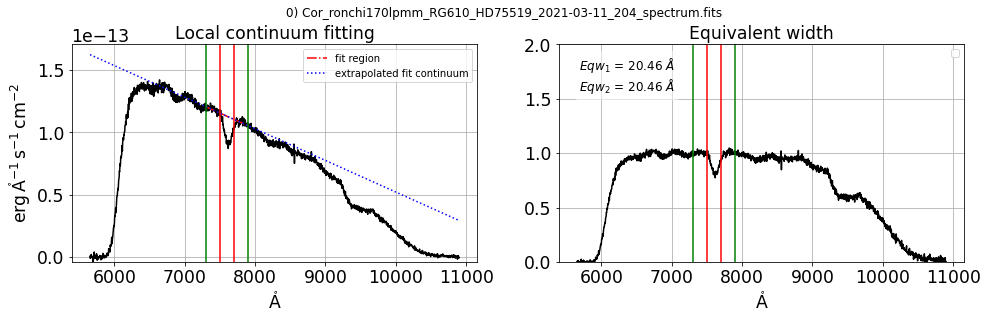

0 ) eqw_O2= 20.463954891086928
1 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_205_spectrum.fits


2021-04-22 12:03:47  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


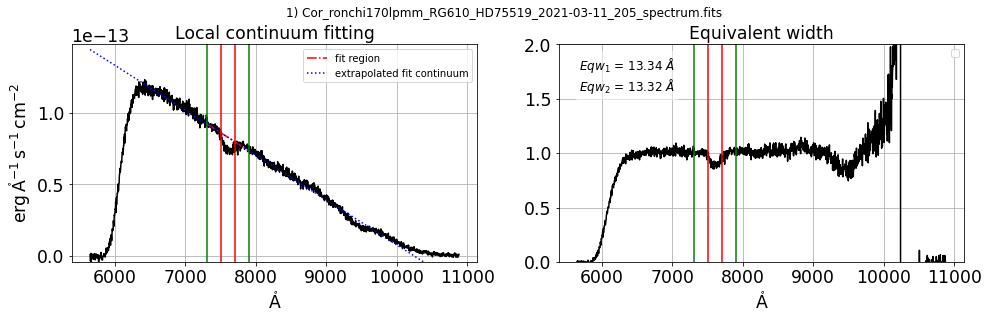

1 ) eqw_O2= 13.336215375612113
2 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_206_spectrum.fits


2021-04-22 12:03:53  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


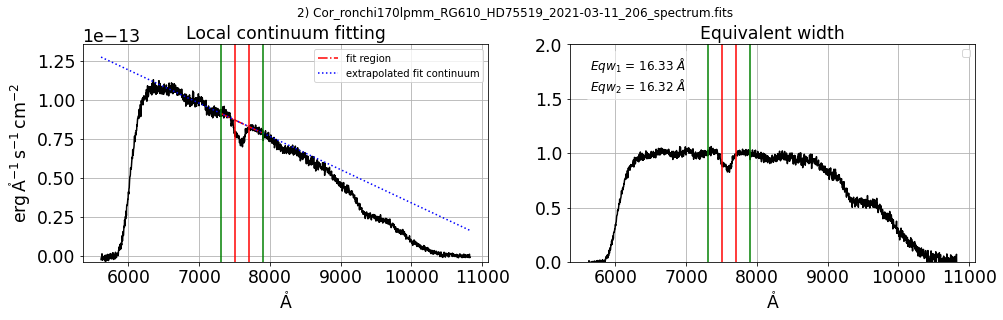

2 ) eqw_O2= 16.32570682716957
3 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_207_spectrum.fits


2021-04-22 12:04:01  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


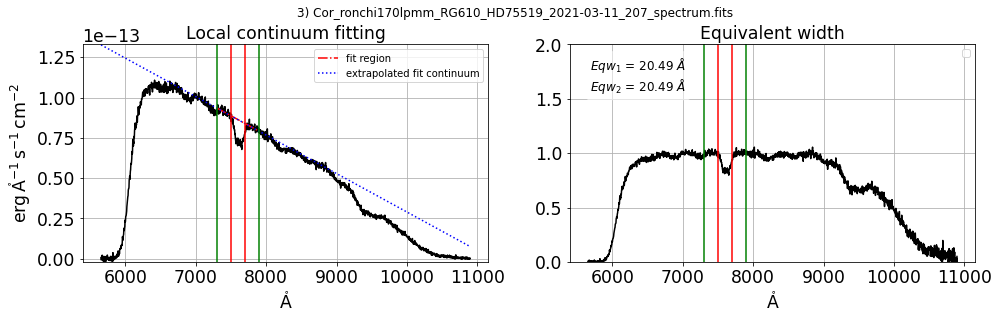

3 ) eqw_O2= 20.49050404527071
4 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_208_spectrum.fits


2021-04-22 12:04:08  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


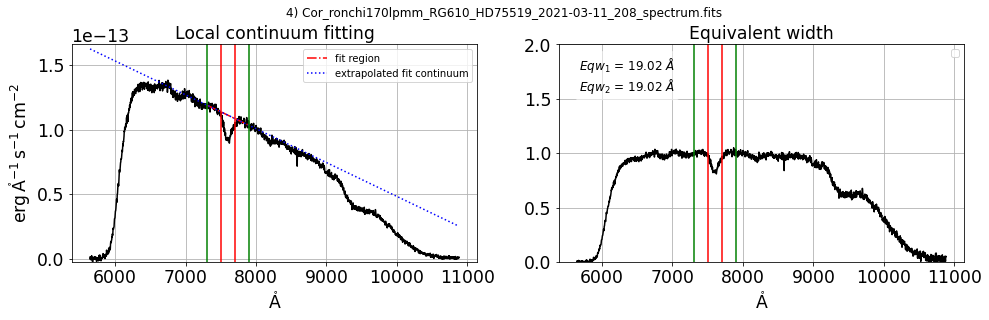

4 ) eqw_O2= 19.023835908516418
5 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_209_spectrum.fits


2021-04-22 12:04:14  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


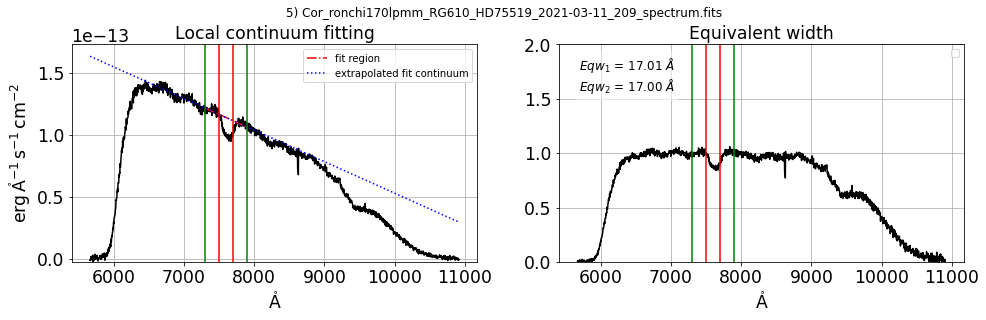

5 ) eqw_O2= 17.00614784143275
6 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_210_spectrum.fits


2021-04-22 12:04:22  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


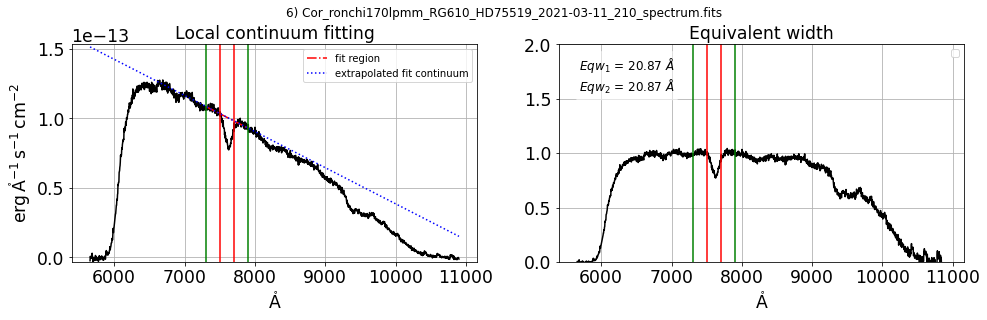

6 ) eqw_O2= 20.869564768253497
7 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_211_spectrum.fits


2021-04-22 12:04:29  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


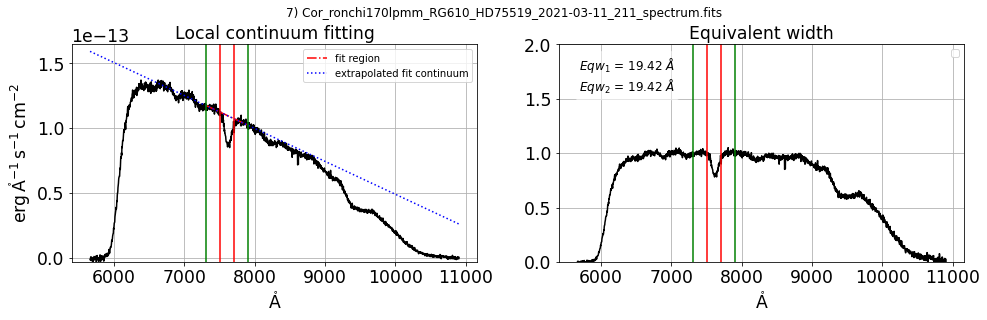

7 ) eqw_O2= 19.41932676446646
8 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_212_spectrum.fits


2021-04-22 12:04:35  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


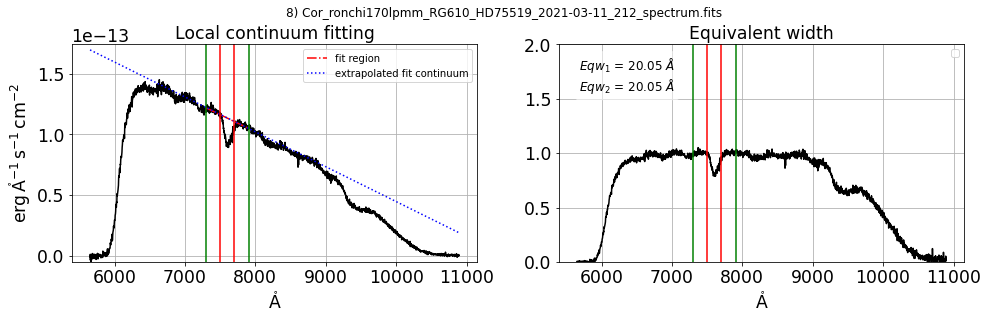

8 ) eqw_O2= 20.049948505284817
9 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_213_spectrum.fits


2021-04-22 12:04:42  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


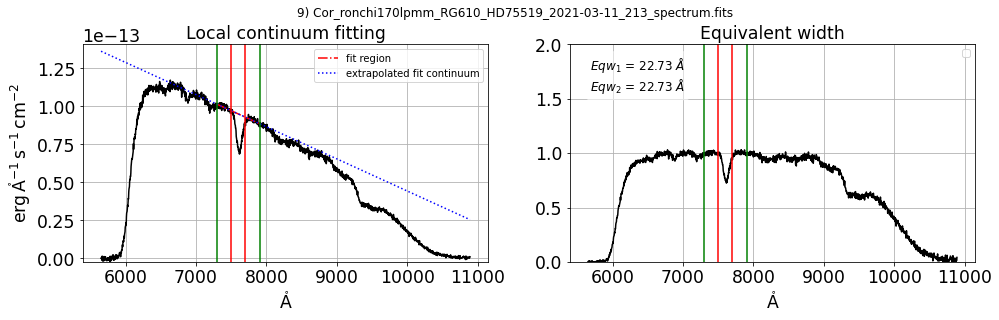

9 ) eqw_O2= 22.727767808336267
10 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_214_spectrum.fits


2021-04-22 12:04:49  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


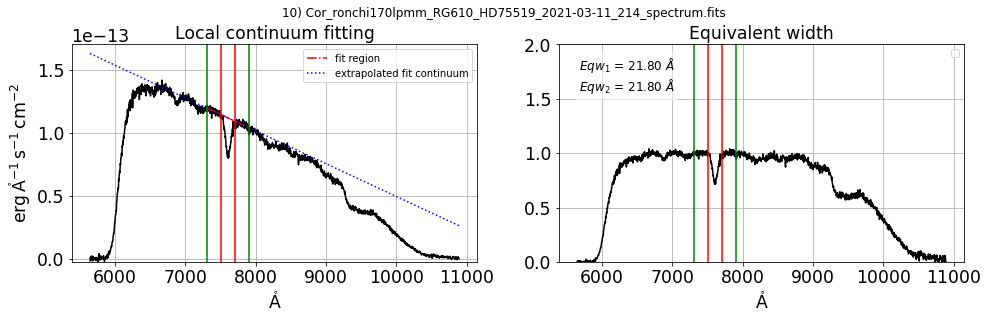

10 ) eqw_O2= 21.797864663103212
11 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_215_spectrum.fits


2021-04-22 12:04:56  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


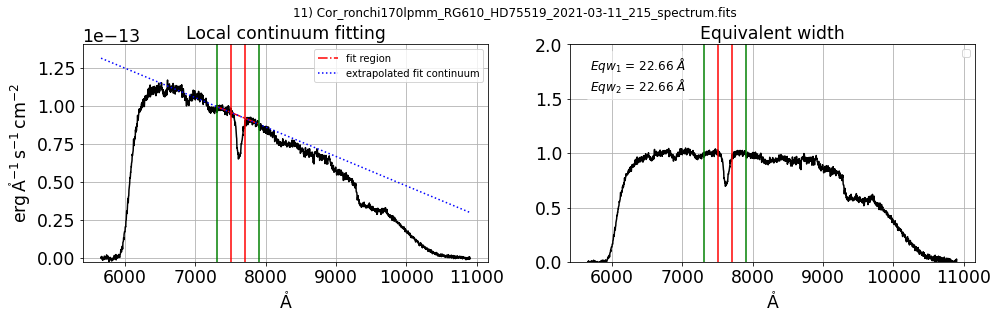

11 ) eqw_O2= 22.658874953195777
12 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_260_spectrum.fits


2021-04-22 12:05:03  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


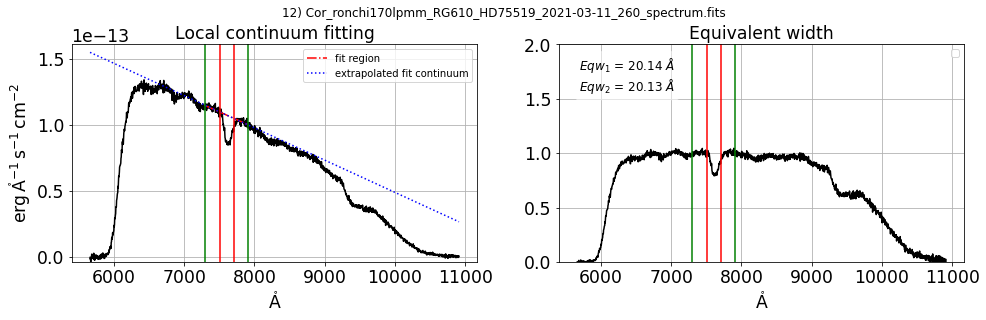

12 ) eqw_O2= 20.135428766759674
13 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_261_spectrum.fits


2021-04-22 12:05:10  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


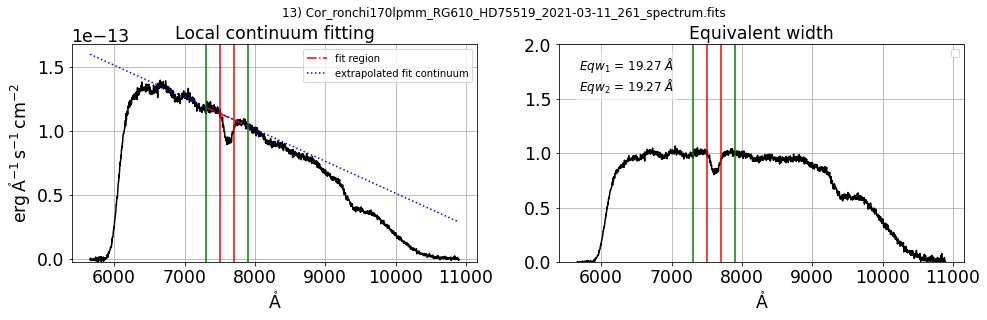

13 ) eqw_O2= 19.270964130018598
14 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_267_spectrum.fits


2021-04-22 12:05:17  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


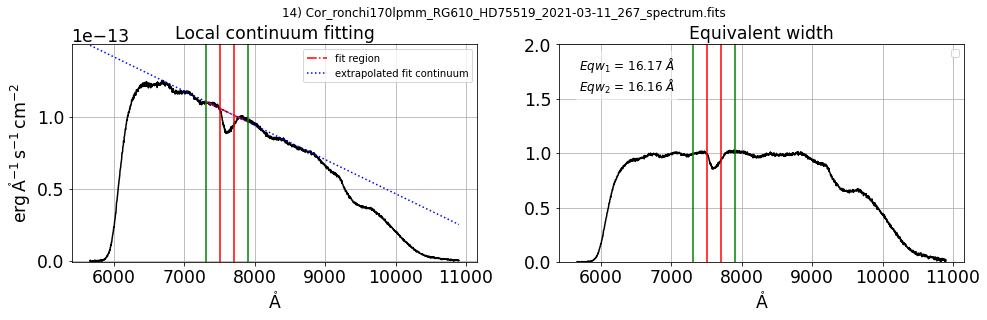

14 ) eqw_O2= 16.16716726438071
15 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_268_spectrum.fits


2021-04-22 12:05:25  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


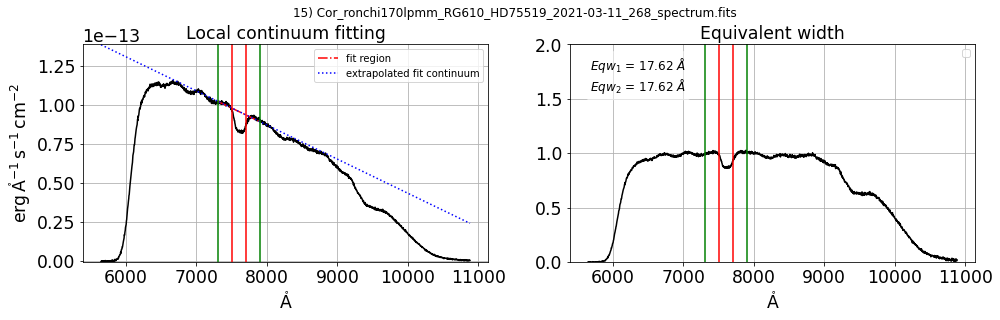

15 ) eqw_O2= 17.617722241741745
16 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_269_spectrum.fits


2021-04-22 12:05:32  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


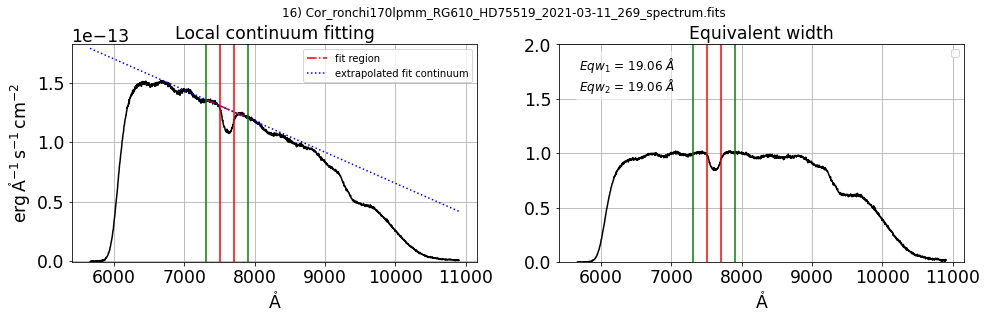

16 ) eqw_O2= 19.06073067648316
17 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_270_spectrum.fits


2021-04-22 12:05:39  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


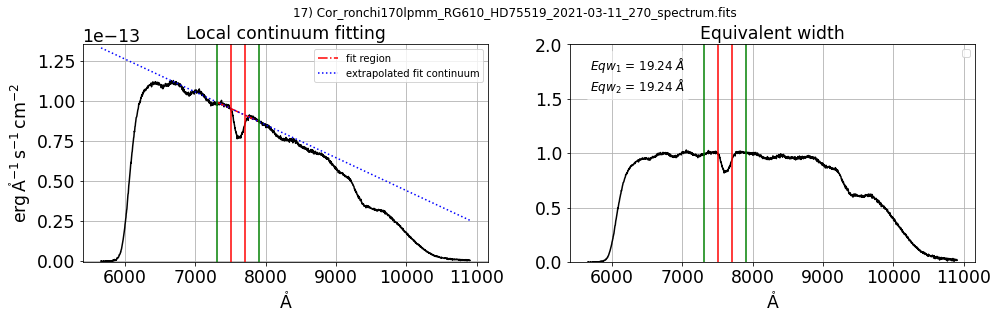

17 ) eqw_O2= 19.240367201084467
18 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_271_spectrum.fits


2021-04-22 12:05:46  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


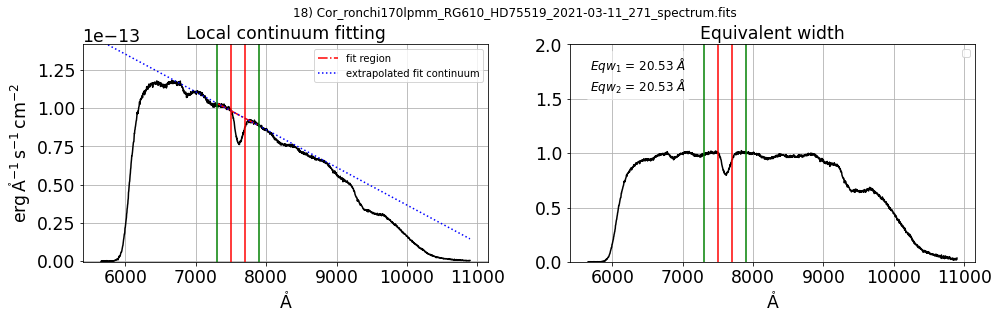

18 ) eqw_O2= 20.5277214241967
19 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_272_spectrum.fits


2021-04-22 12:05:53  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


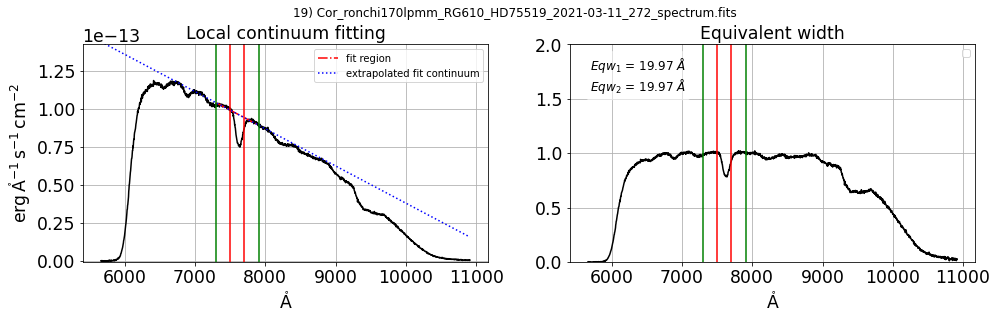

19 ) eqw_O2= 19.973425019554213
20 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_273_spectrum.fits


2021-04-22 12:06:00  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


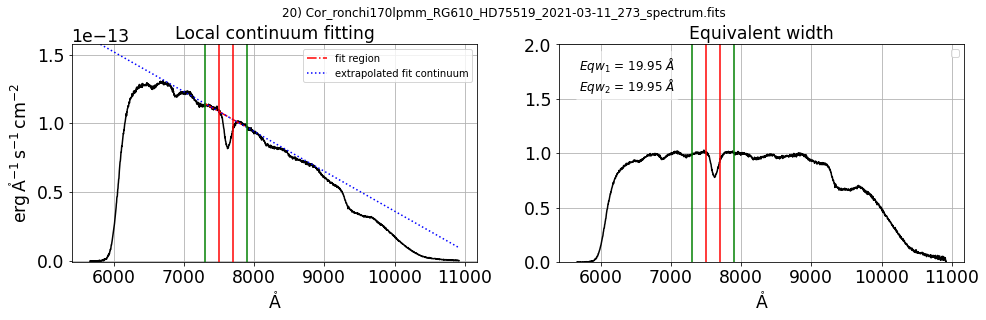

20 ) eqw_O2= 19.94907175683582
21 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_274_spectrum.fits


2021-04-22 12:06:09  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


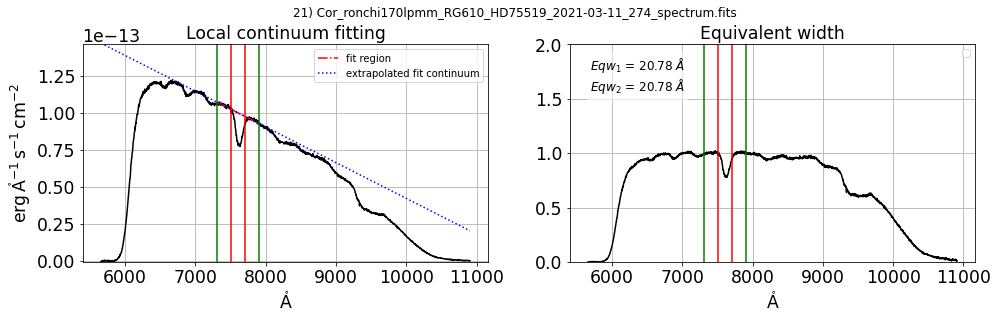

21 ) eqw_O2= 20.78030699389521
22 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_275_spectrum.fits


2021-04-22 12:06:19  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


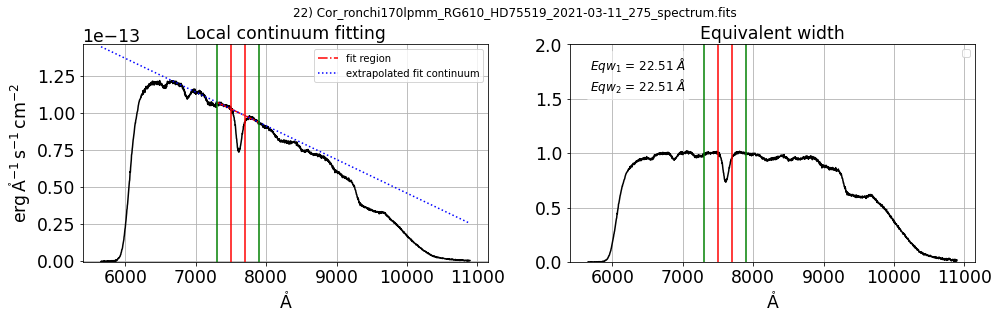

22 ) eqw_O2= 22.511930089911573
23 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_277_spectrum.fits


2021-04-22 12:06:27  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


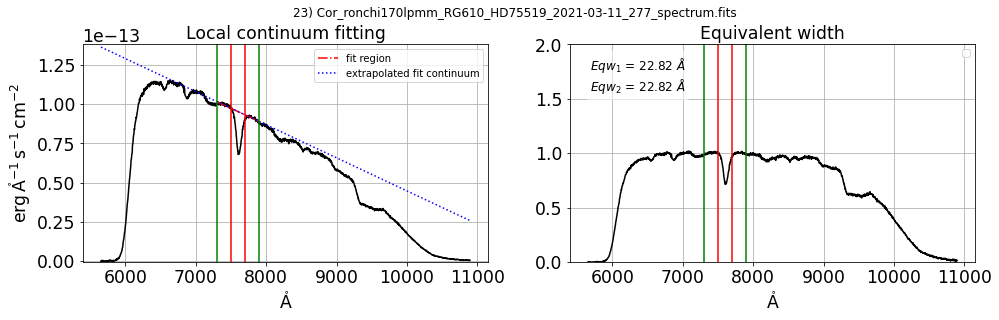

23 ) eqw_O2= 22.817797624457512
24 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_278_spectrum.fits


2021-04-22 12:06:35  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


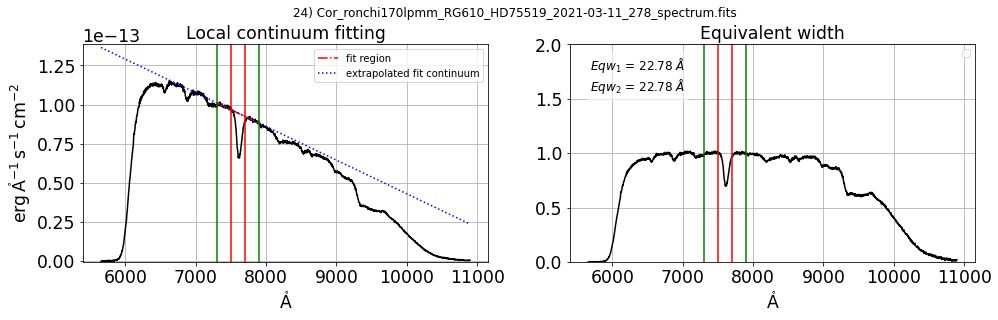

24 ) eqw_O2= 22.783602166153486
25 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_279_spectrum.fits


2021-04-22 12:06:42  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


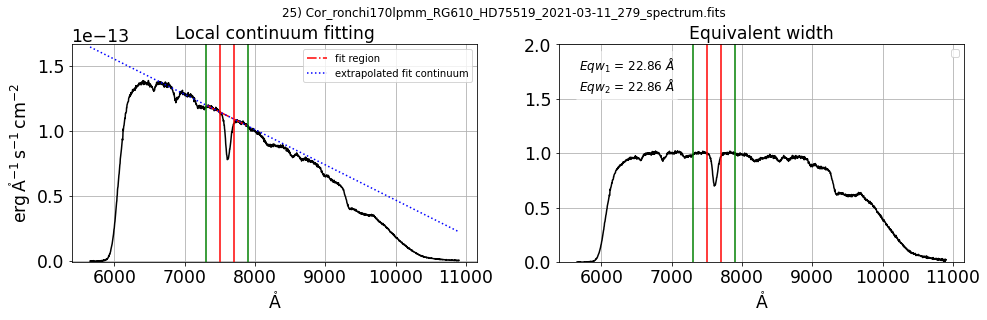

25 ) eqw_O2= 22.85932458207739
26 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_280_spectrum.fits


2021-04-22 12:06:49  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


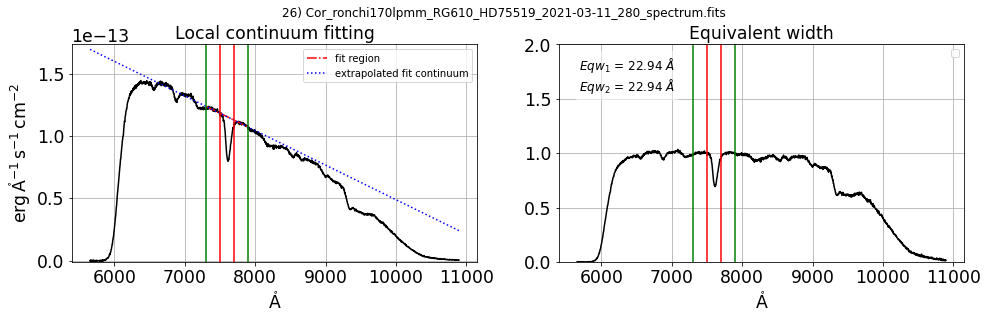

26 ) eqw_O2= 22.93868189618584
27 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_281_spectrum.fits


2021-04-22 12:06:57  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


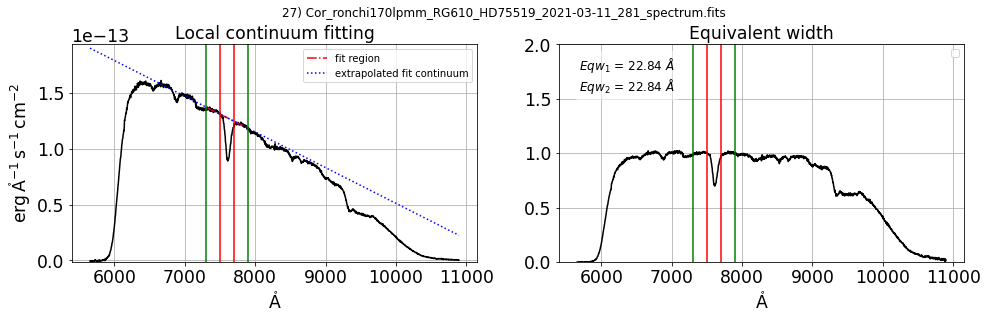

27 ) eqw_O2= 22.841481194608377
28 )  Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_282_spectrum.fits


2021-04-22 12:07:05  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


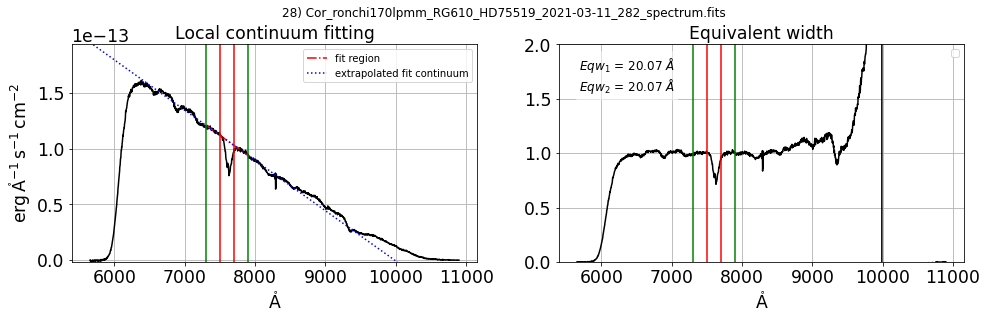

28 ) eqw_O2= 20.07057831377955


In [151]:
WLMIN=300
WLMAX=1000
lambdas = np.arange(WLMIN,WLMAX,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)
parameters.DISPLAY=False


for IDXSEL in np.arange(0,29):

    filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
    filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
    fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
    fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")
    
    # load the spectrum
    
    print(IDXSEL,") ",filename_SEL)
    
    s=Spectrum(fullfilename_SEL, config="config/auxtel_quicklook.ini")
    s.load_spectrogram(fullfilename_spectrogram_SEL) 
    
    
    lamb = 10*s.lambdas * u.AA 
    flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10 
    spec = Spectrum1D(spectral_axis=lamb, flux=flux) 
    fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
    specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)
    
    # O2 line
    wlmin=10*(O2_1.wavelength-30)*u.AA
    wlmax=10*(O2_1.wavelength+30)*u.AA
    wlminline=10*(O2_1.wavelength-10)*u.AA
    wlmaxline=10*(O2_1.wavelength+10)*u.AA
    
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    eqw10,eqw20=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    #eqw10,eqw20,eq1_set,eq2_set=ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=ax1,ax2=ax2)
    thetitle=str(IDXSEL)+") "+filename_SEL
    plt.suptitle(thetitle,y=1.01)
    plt.show() 
    
    print(IDXSEL,") eqw_O2=",eqw10)
    
    df_infos.at[IDXSEL,"eqw_o2"] =  eqw10

# Loop on spectrum, compute H2O line equivalent width with specutils 

2021-04-22 12:07:13  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


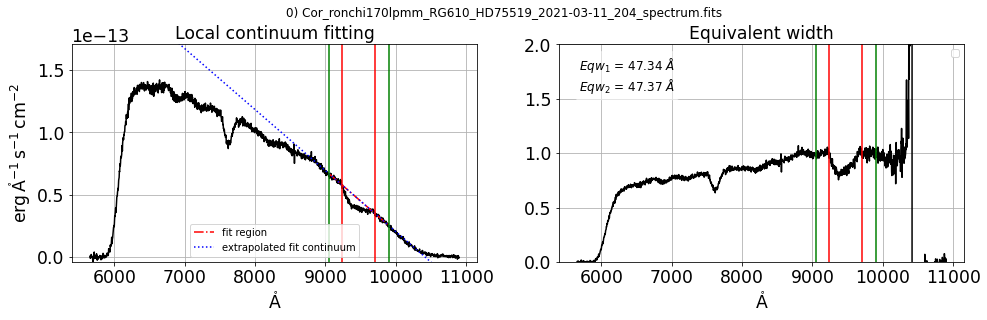

0 ) eqw_O2= 47.33582593948182


2021-04-22 12:07:22  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


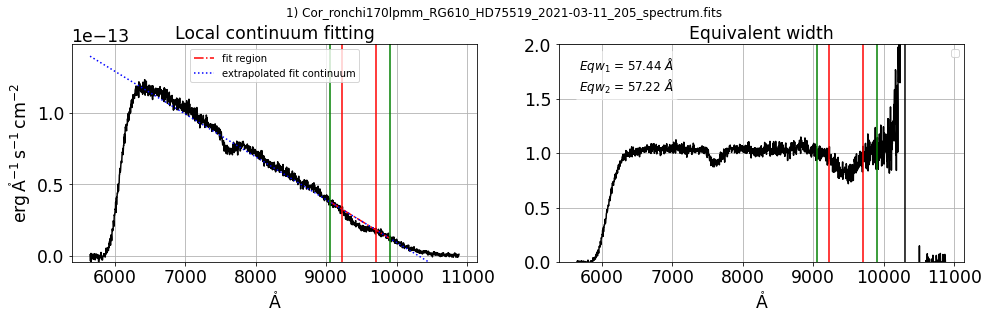

1 ) eqw_O2= 57.44240592153983


2021-04-22 12:07:32  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


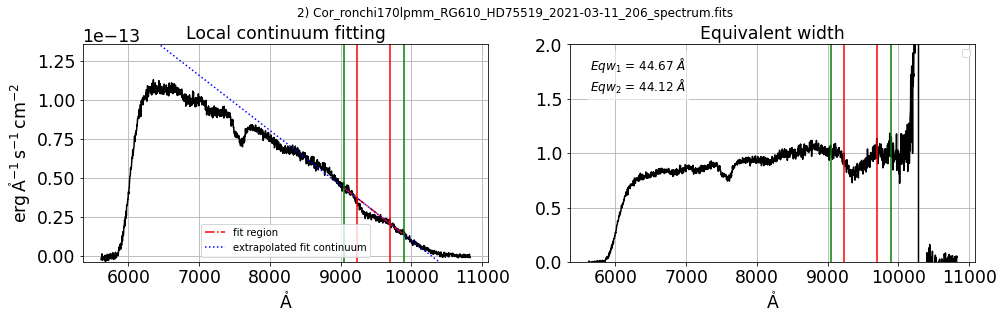

2 ) eqw_O2= 44.66582969294791


2021-04-22 12:07:41  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


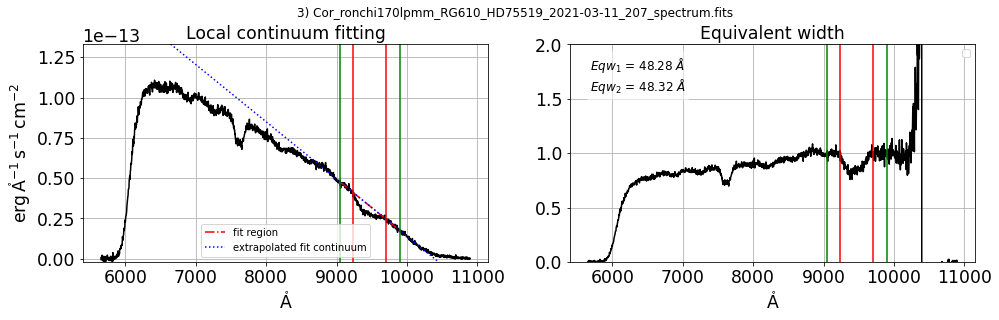

3 ) eqw_O2= 48.2763287625495


2021-04-22 12:07:49  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


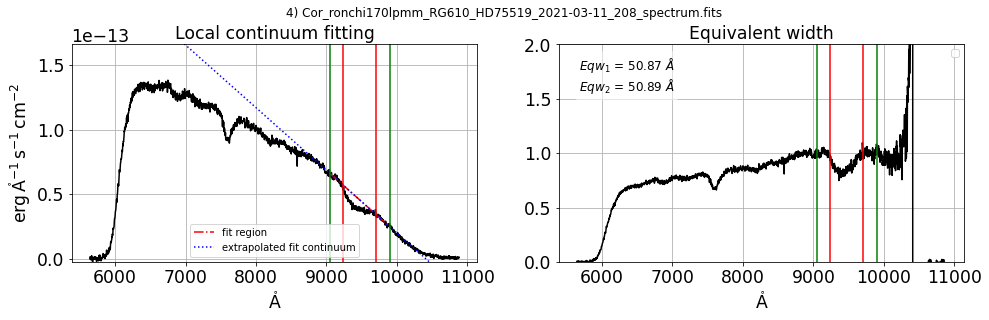

4 ) eqw_O2= 50.87156309504371


2021-04-22 12:07:57  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


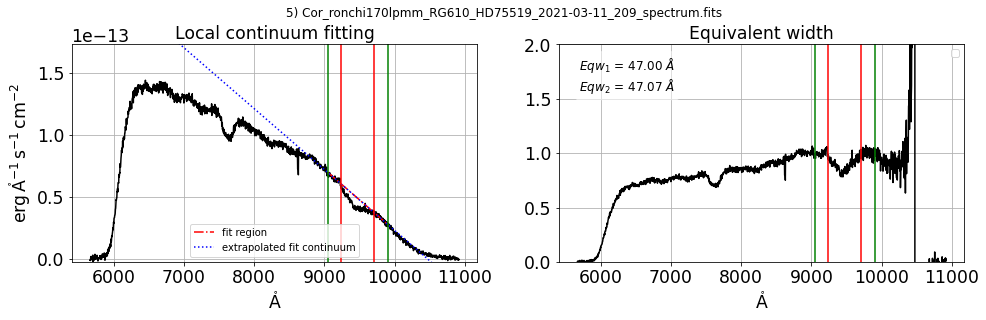

5 ) eqw_O2= 47.00158470603418


2021-04-22 12:08:05  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


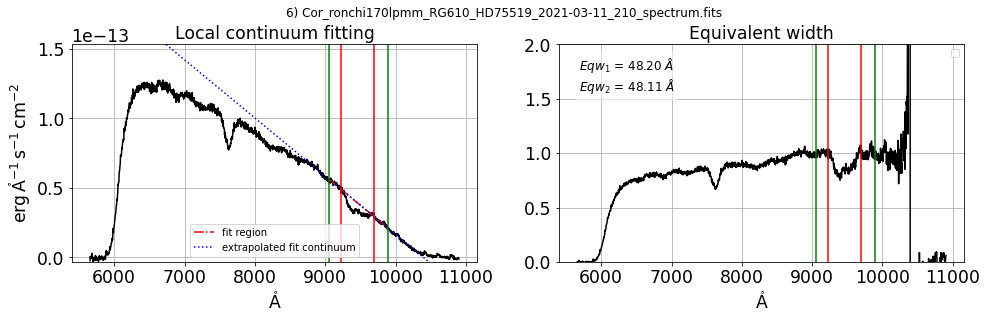

6 ) eqw_O2= 48.19702663040266


2021-04-22 12:08:13  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


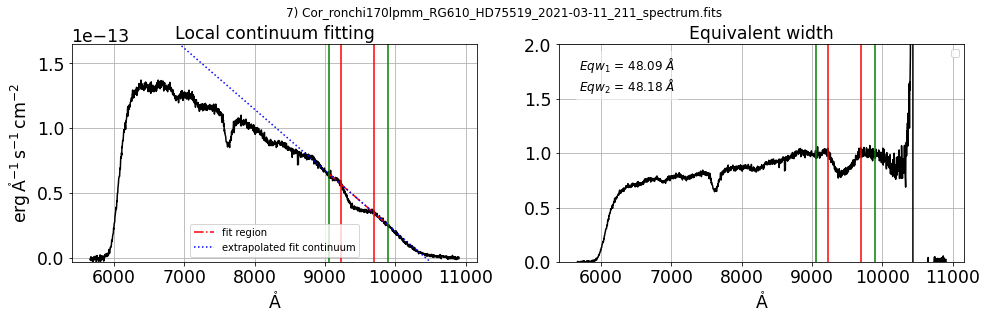

7 ) eqw_O2= 48.09091029101165


2021-04-22 12:08:22  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


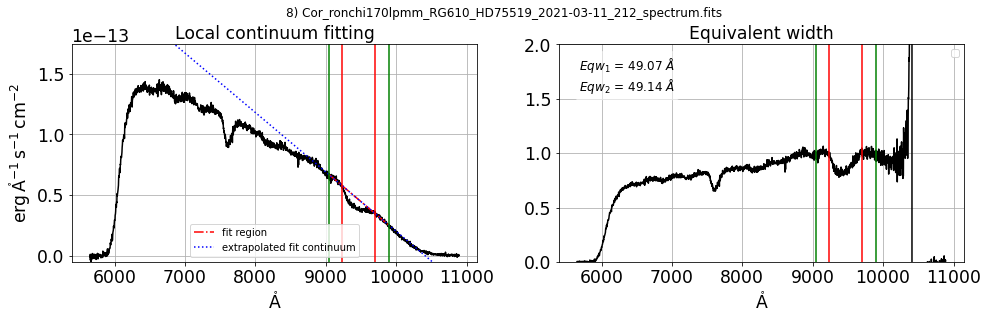

8 ) eqw_O2= 49.066157687077066


2021-04-22 12:08:30  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


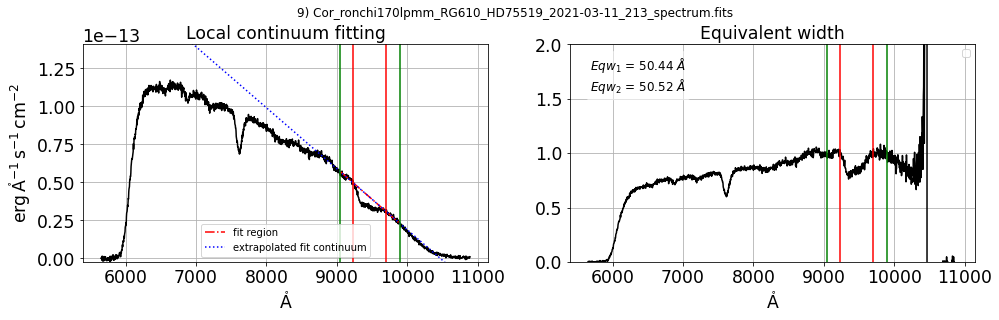

9 ) eqw_O2= 50.444448944878786


2021-04-22 12:08:39  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


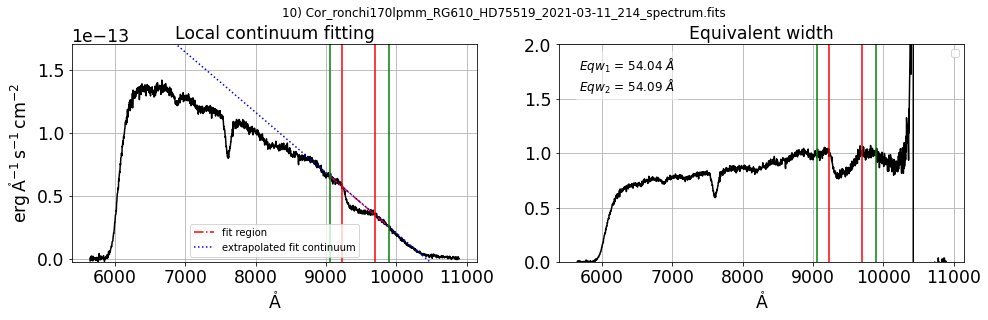

10 ) eqw_O2= 54.03836933509717


2021-04-22 12:08:47  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


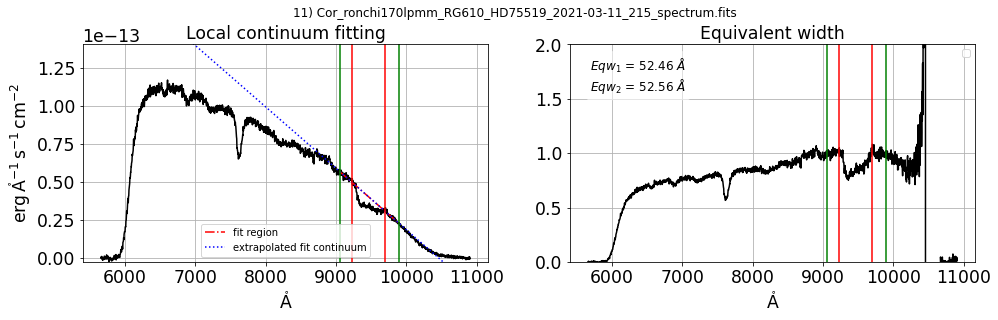

11 ) eqw_O2= 52.463704134333454


2021-04-22 12:08:54  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


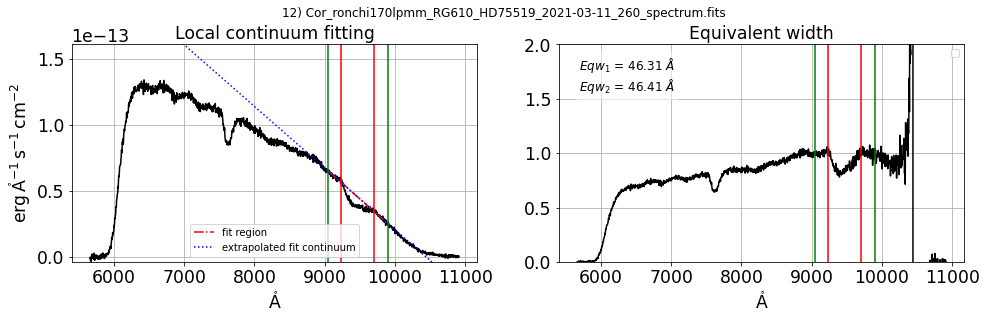

12 ) eqw_O2= 46.305817874761146


2021-04-22 12:09:03  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


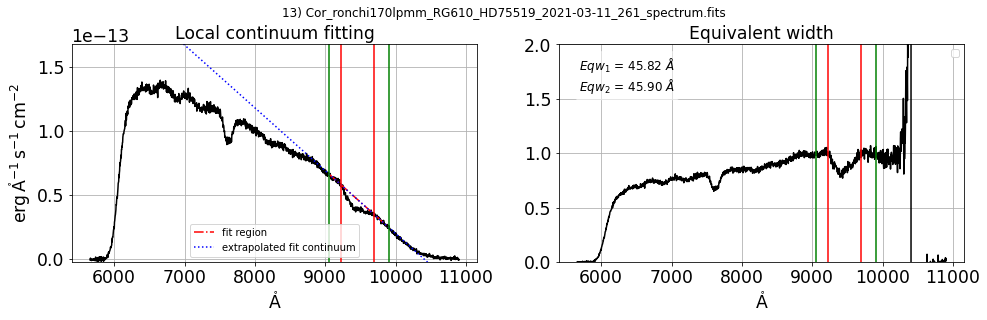

13 ) eqw_O2= 45.81538722798723


2021-04-22 12:09:10  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


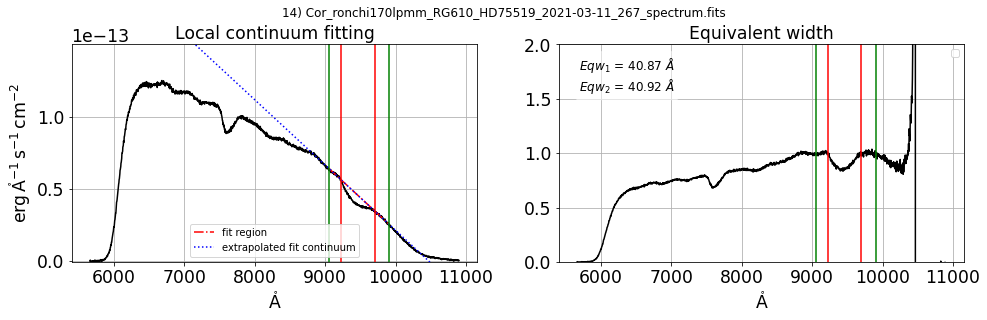

14 ) eqw_O2= 40.86776480537458


2021-04-22 12:09:19  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


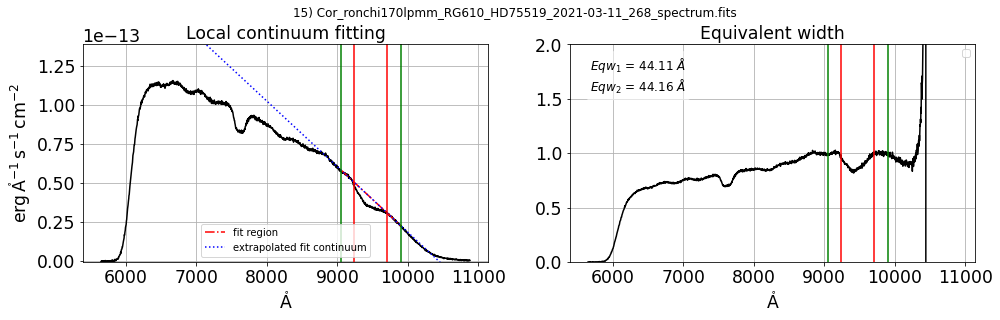

15 ) eqw_O2= 44.11327306048554


2021-04-22 12:09:27  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


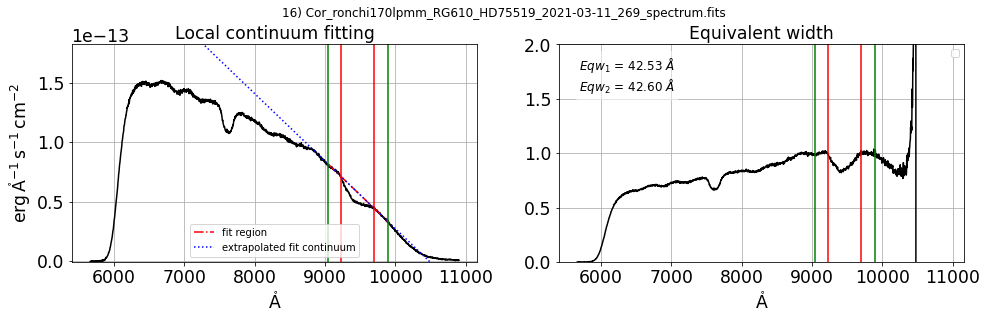

16 ) eqw_O2= 42.53028202577525


2021-04-22 12:09:35  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


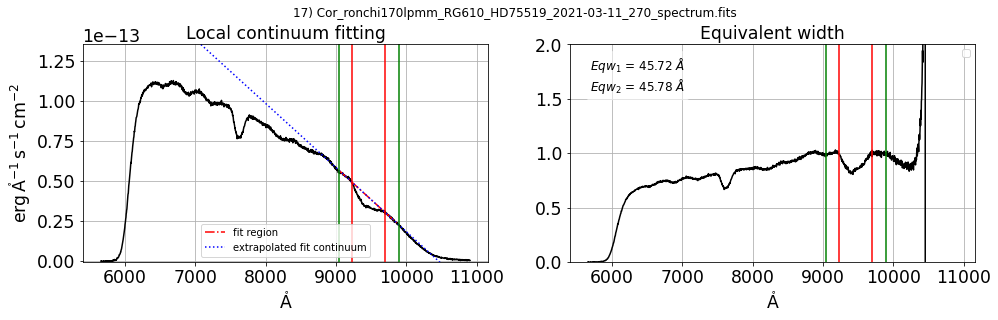

17 ) eqw_O2= 45.71944707636544


2021-04-22 12:09:43  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


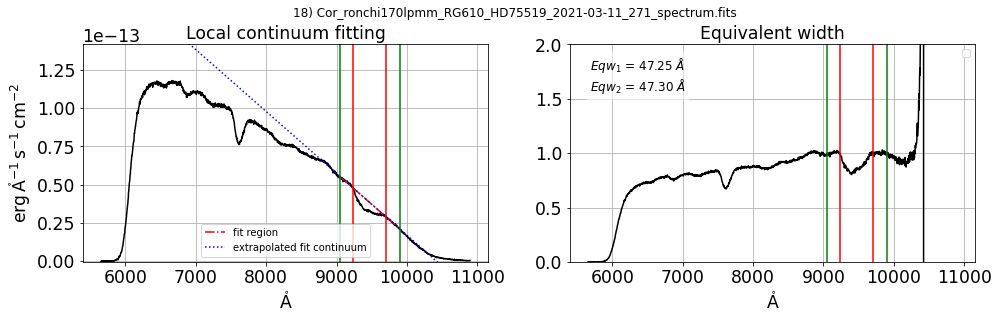

18 ) eqw_O2= 47.24978049167942


2021-04-22 12:09:52  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


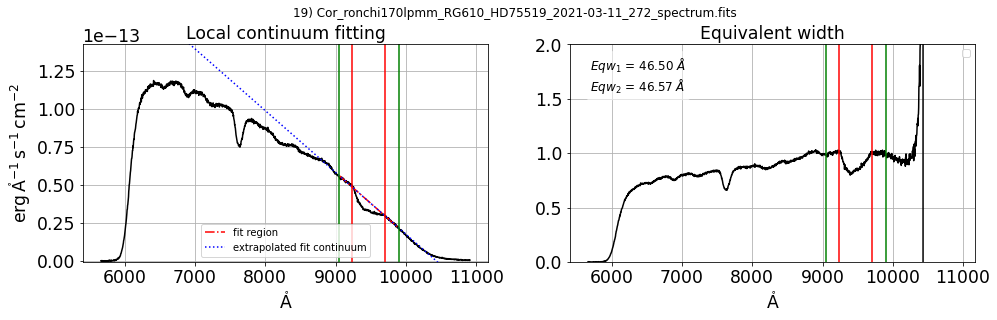

19 ) eqw_O2= 46.501188327900365


2021-04-22 12:10:01  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


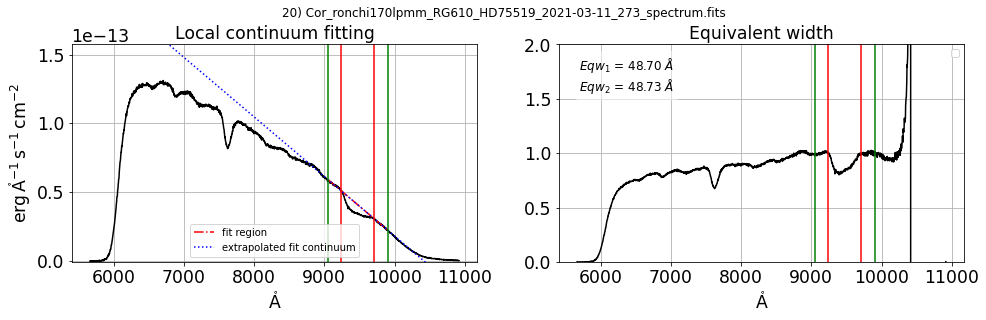

20 ) eqw_O2= 48.69659866104013


2021-04-22 12:10:11  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


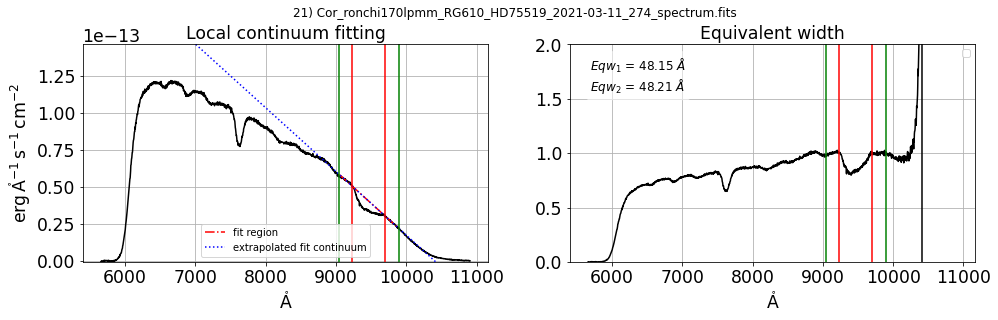

21 ) eqw_O2= 48.15019152039713


2021-04-22 12:10:20  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


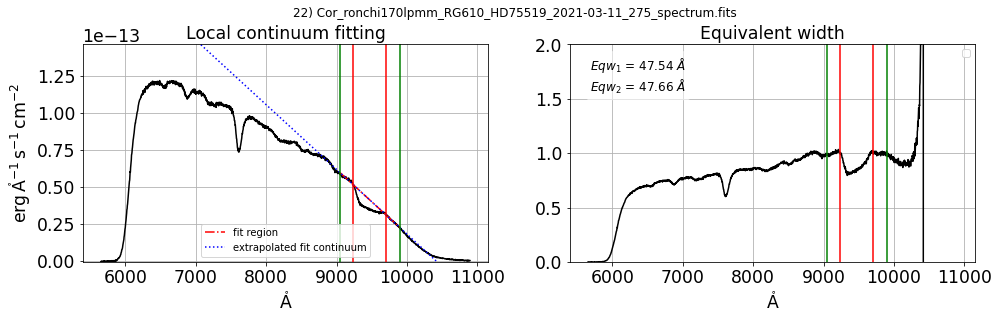

22 ) eqw_O2= 47.54146198728057


2021-04-22 12:10:29  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


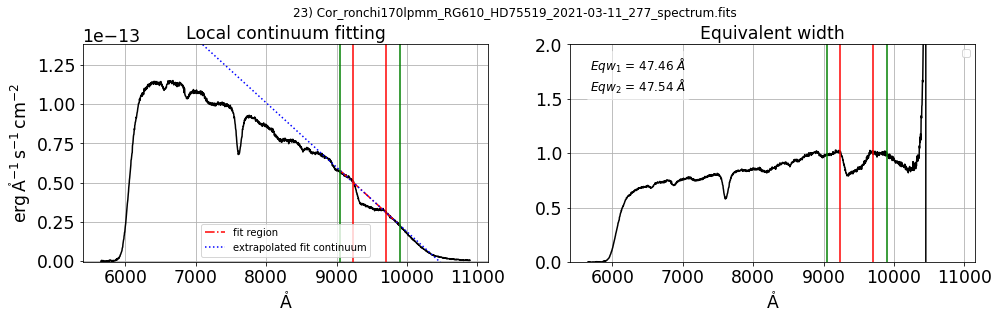

23 ) eqw_O2= 47.45887841934564


2021-04-22 12:10:38  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


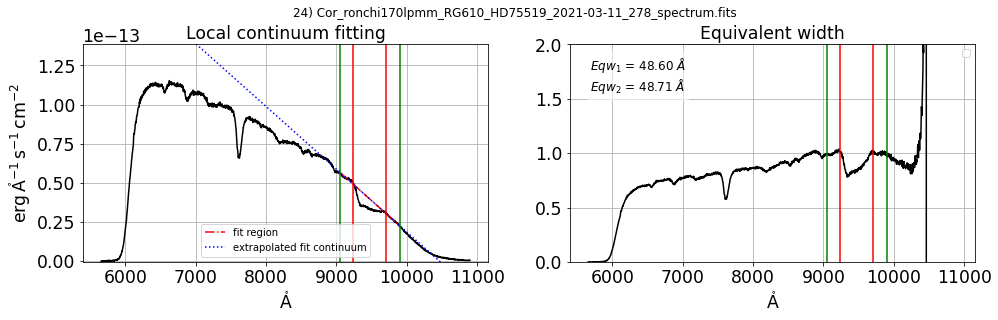

24 ) eqw_O2= 48.60435466026513


2021-04-22 12:10:46  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


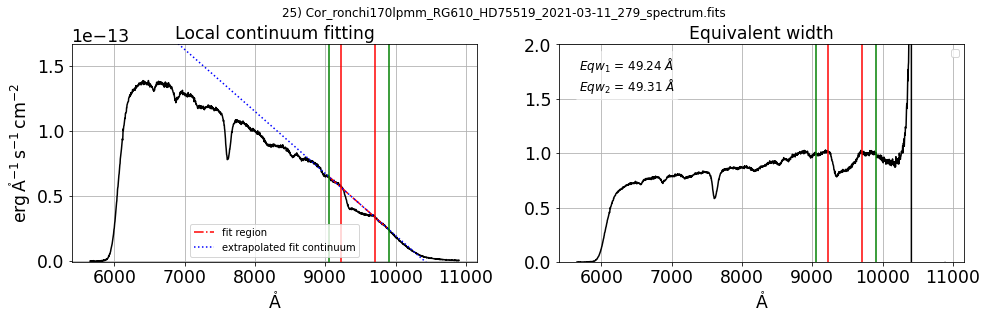

25 ) eqw_O2= 49.24155845037615


2021-04-22 12:10:55  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


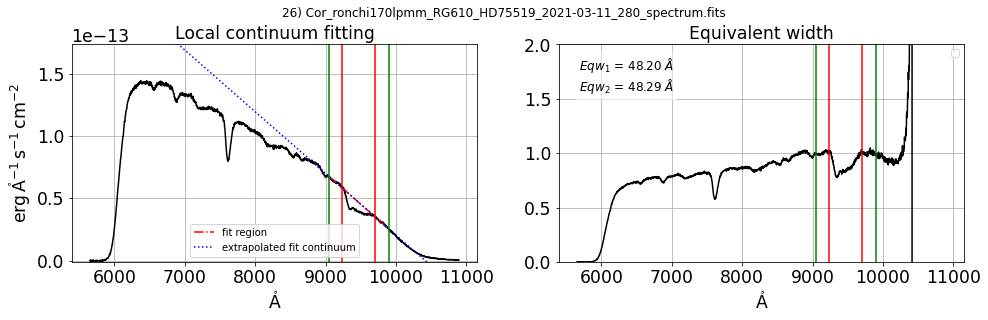

26 ) eqw_O2= 48.198175947773905


2021-04-22 12:11:04  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


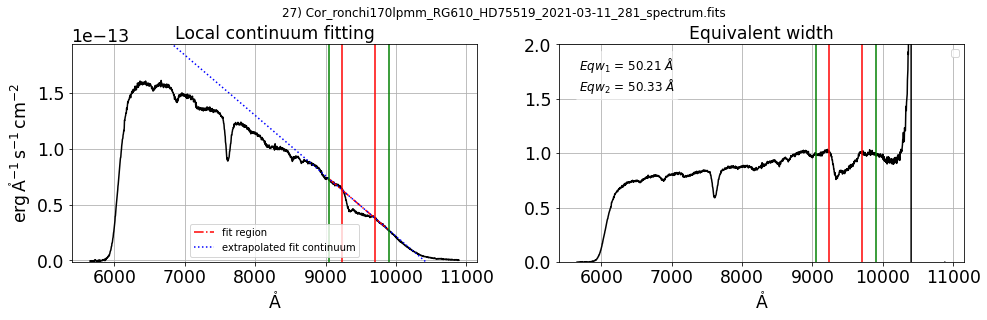

27 ) eqw_O2= 50.21416287209286


2021-04-22 12:11:13  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


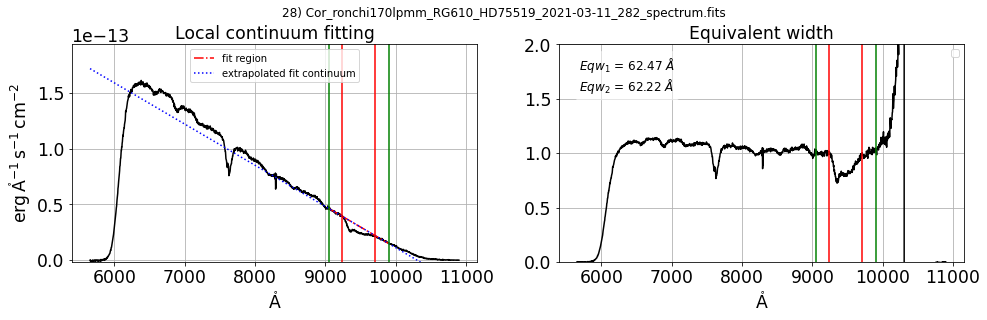

28 ) eqw_O2= 62.46551461646209


In [152]:
WLMIN=300
WLMAX=1000
lambdas = np.arange(WLMIN,WLMAX,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)
parameters.DISPLAY=False


for IDXSEL in np.arange(0,29):
    filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
    filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
    fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
    fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")
    
    # load the spectrum
    s=Spectrum(fullfilename_SEL, config="config/auxtel_quicklook.ini")
    s.load_spectrogram(fullfilename_spectrogram_SEL) 
    
    
    lamb = 10*s.lambdas * u.AA 
    flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10 
    spec = Spectrum1D(spectral_axis=lamb, flux=flux) 
    fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
    specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)
    
    # H2O line
    
    wlmin=10*(H2O_1.wavelength-30)*u.AA
    wlmax=10*(H2O_2.wavelength+30)*u.AA
    wlminline=10*(H2O_1.wavelength-12)*u.AA
    wlmaxline=10*(H2O_2.wavelength+10)*u.AA
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    eqw1,eqw2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    #eqw10,eqw20,eq1_set,eq2_set=ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=ax1,ax2=ax2)
    thetitle=str(IDXSEL)+") "+filename_SEL
    plt.suptitle(thetitle,y=1.01)
    plt.show() 
    
    print(IDXSEL,") eqw_O2=",eqw1)
    
    df_infos.at[IDXSEL,"eqw_h2o"] =  eqw1

In [153]:
df_infos

date_obs   airmass  temperature  pressure  humidity  \
idx                                                                       
0    2021-03-12T01:59:39.222  1.015865         11.7    742.75      49.0   
1    2021-03-12T02:00:34.041  1.015711         11.8    742.75      50.0   
2    2021-03-12T02:00:45.847  1.015682         11.8    742.75      50.0   
3    2021-03-12T02:00:55.963  1.015652         11.8    742.75      50.0   
4    2021-03-12T02:01:05.399  1.015628         11.8    742.75      50.0   
5    2021-03-12T02:01:14.535  1.015604         11.8    742.75      50.0   
6    2021-03-12T02:01:23.959  1.015580         11.8    742.75      50.0   
7    2021-03-12T02:01:33.423  1.015556         11.8    742.75      50.0   
8    2021-03-12T02:01:42.583  1.015534         11.8    742.75      50.0   
9    2021-03-12T02:01:51.595  1.015511         11.7    742.75      49.0   
10   2021-03-12T02:02:01.208  1.015488         11.7    742.75      49.0   
11   2021-03-12T02:02:10.132  1.015467         11.7    742.75      49.0   
12   2021-03-12T02:27:40.385  1.016017         11.5    742.70      50.0   
13   2021-03-12T02:28:19.492  1.016133         11.5    742.70      48.0   
14   2021-03-12T02:34:03.294  1.017425         12.0    742.70      52.0   
15   2021-03-12T02:34:32.382  1.017556         12.0    742.70      52.0   
16   2021-03-12T02:35:01.511  1.017691         12.0    742.70      52.0   
17   2021-03-12T02:35:30.613  1.017829         12.0    742.70      51.0   
18   2021-03-12T02:35:59.774  1.017970         12.0    742.70      51.0   
19   2021-03-12T02:36:29.008  1.018115         12.0    742.70      51.0   
20   2021-03-12T02:36:58.091  1.018262         12.0    742.70      51.0   
21   2021-03-12T02:37:27.192  1.018412         11.9    742.65      51.0   
22   2021-03-12T02:37:56.292  1.018565         11.9    742.65      51.0   
23   2021-03-12T02:38:54.496  1.018881         11.9    742.70      52.0   
24   2021-03-12T02:39:23.593  1.019045         12.0    742.70      55.0   
25   2021-03-12T02:39:52.764  1.019210         12.0    742.70      55.0   
26   2021-03-12T02:40:21.908  1.019379         11.9    742.70      55.0   
27   2021-03-12T02:40:50.895  1.019551         11.9    742.70      55.0   
28   2021-03-12T02:41:20.150  1.019726         11.9    742.70      55.0   

      reftime    eqw_h2o     eqw_o2  eqw_o2_spec  
idx                                               
0    0.000000  47.335826  20.463955          NaN  
1    0.015228  57.442406  13.336215          NaN  
2    0.018507  44.665830  16.325707          NaN  
3    0.021317  48.276329  20.490504          NaN  
4    0.023938  50.871563  19.023836          NaN  
5    0.026476  47.001585  17.006148          NaN  
6    0.029094  48.197027  20.869565          NaN  
7    0.031722  48.090910  19.419327          NaN  
8    0.034267  49.066158  20.049949          NaN  
9    0.036770  50.444449  22.727768          NaN  
10   0.039441  54.038369  21.797865          NaN  
11   0.041919  52.463704  22.658875          NaN  
12   0.466990  46.305818  20.135429          NaN  
13   0.477853  45.815387  19.270964          NaN  
14   0.573353  40.867765  16.167167          NaN  
15   0.581433  44.113273  17.617722          NaN  
16   0.589525  42.530282  19.060731          NaN  
17   0.597609  45.719447  19.240367          NaN  
18   0.605709  47.249780  20.527721          NaN  
19   0.613829  46.501188  19.973425          NaN  
20   0.621908  48.696599  19.949072          NaN  
21   0.629992  48.150192  20.780307          NaN  
22   0.638075  47.541462  22.511930          NaN  
23   0.654243  47.458878  22.817798          NaN  
24   0.662325  48.604355  22.783602          NaN  
25   0.670428  49.241558  22.859325          NaN  
26   0.678524  48.198176  22.938682          NaN  
27   0.686576  50.214163  22.841481          NaN  
28   0.694702  62.465515  20.070578          NaN

In [154]:
df_infos.to_csv("eqw_ronchi.csv")

Text(0.5, 1.0, 'Equivalent Widths vs date')

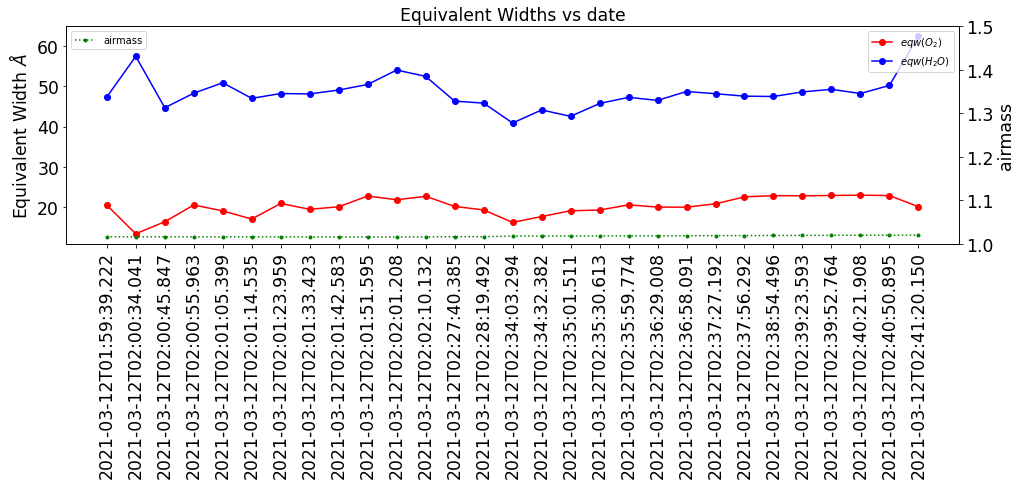

In [155]:
fig=plt.figure(figsize=(16,4))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
ax.plot(df_infos['date_obs'], df_infos['eqw_o2'],marker="o",color="red",label="$eqw(O_2)$");
ax.plot(df_infos['date_obs'], df_infos['eqw_h2o'],marker="o",color="blue",label="$eqw(H_2O)$");
#ax.set_xticks(rotation='vertical');
ax.xaxis.set_tick_params(rotation=90)
ax.legend(loc="upper right")
ax.set_ylabel("Equivalent Width $\AA$")
ax2 = ax.twinx()
ax2.plot(df_infos['date_obs'], df_infos['airmass'],linestyle='dotted', marker='.',color="green",label="airmass")
ax2.set_ylim(1,1.5)
ax2.legend(loc="upper left")
ax2.set_ylabel("airmass")
ax.set_title("Equivalent Widths vs date")

Text(0.5, 1.0, 'Equivalent Widths vs date')

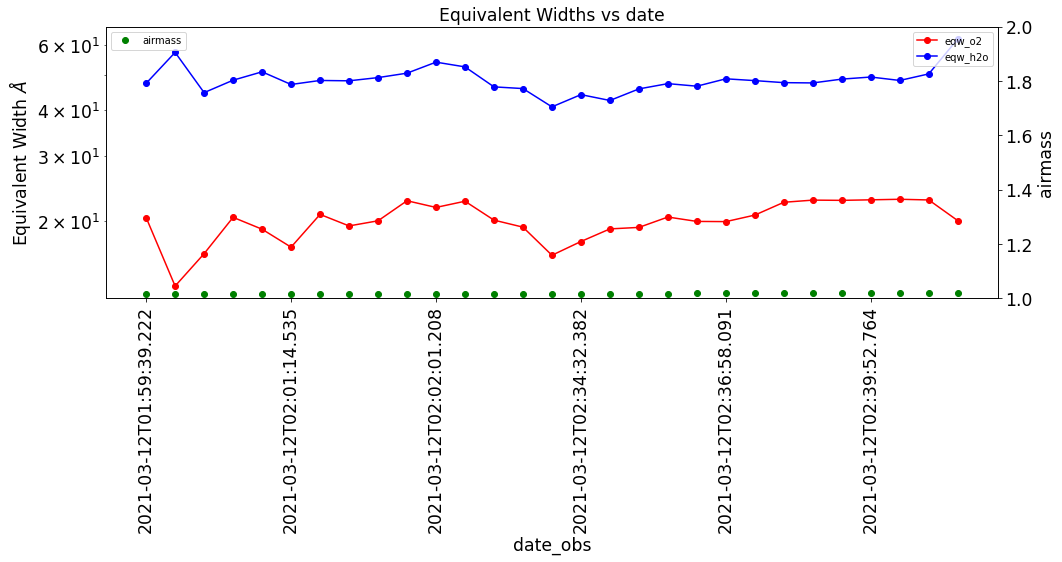

In [156]:
fig=plt.figure(figsize=(16,5))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
df_infos.plot(ax=ax,x="date_obs", y=["eqw_o2","eqw_h2o"],color=["r","b"],marker="o");
#plt.gcf().autofmt_xdate(rotation=90) 
ax.xaxis.set_tick_params(rotation=90)
ax.legend(loc="upper right")
ax.set_ylabel("Equivalent Width $\AA$")
ax.set_yscale("log")

ax2 = ax.twinx()
df_infos.plot(ax=ax2,x="date_obs", y="airmass",color=["g"],marker="o",lw=0);
ax2.legend(loc="upper left")
ax2.set_ylabel("airmass")
ax2.set_ylim(1,2)
ax2.xaxis.set_tick_params(rotation=90)
ax.set_title("Equivalent Widths vs date")


Text(0.5, 1.0, 'Equivalent Widths vs date')

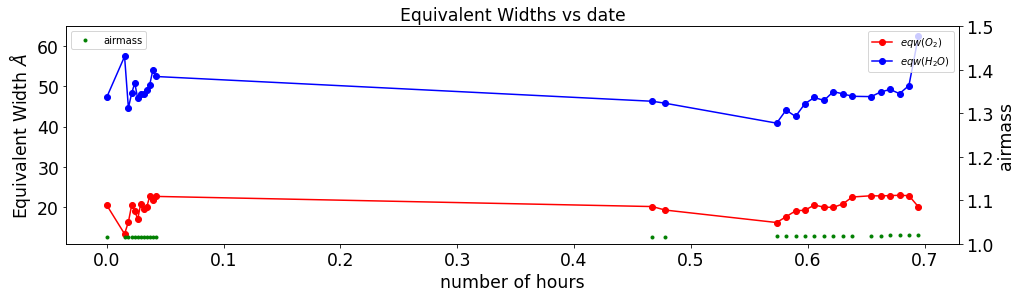

In [157]:
fig=plt.figure(figsize=(16,4))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
ax.plot(df_infos['reftime'], df_infos['eqw_o2'],marker="o",color="red",label="$eqw(O_2)$");
ax.plot(df_infos['reftime'], df_infos['eqw_h2o'],marker="o",color="blue",label="$eqw(H_2O)$");
#ax.set_xticks(rotation='vertical');
#ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("number of hours")
ax.legend(loc="upper right")
ax.set_ylabel("Equivalent Width $\AA$")
ax2 = ax.twinx()
ax2.plot(df_infos['reftime'], df_infos['airmass'],linestyle='dotted', marker='.',color="green",label="airmass",lw=0)
ax2.set_ylim(1,1.5)
ax2.legend(loc="upper left")
ax2.set_ylabel("airmass")
ax.set_title("Equivalent Widths vs date")